In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

#change path
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'kbo'
os.chdir(base_dir)

#mount google driver
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/"

!pwd

/content/drive/My Drive/kbo


In [ ]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization


print(tf.__version__)

2.3.0


In [ ]:
df_2016 = pd.read_csv('/content/drive/My Drive/kbo/kbo_2016.csv')
df_2017 = pd.read_csv('/content/drive/My Drive/kbo/kbo_2017.csv')
df_2018 = pd.read_csv('/content/drive/My Drive/kbo/kbo_2018.csv')
df_2019 = pd.read_csv('/content/drive/My Drive/kbo/kbo_2019.csv')
df_2020 = pd.read_csv('/content/drive/My Drive/kbo/kbo_2020.csv')

### 지표 값 0~1사이로 만들기

In [ ]:
df_2016['AB'] = df_2016['AB'] / 100
df_2016['HIT'] = df_2016['HIT'] / 100
df_2016['RUN'] = df_2016['RUN'] / 100
df_2016['INN2'] = df_2016['INN2'] / 100
df_2016['ER'] = df_2016['ER'] / 100
df_2016['R'] = df_2016['R'] / 100

df_2017['AB'] = df_2017['AB'] / 100
df_2017['HIT'] = df_2017['HIT'] / 100
df_2017['RUN'] = df_2017['RUN'] / 100
df_2017['INN2'] = df_2017['INN2'] / 100
df_2017['ER'] = df_2017['ER'] / 100
df_2017['R'] = df_2017['R'] / 100

df_2018['AB'] = df_2018['AB'] / 100
df_2018['HIT'] = df_2018['HIT'] / 100
df_2018['RUN'] = df_2018['RUN'] / 100
df_2018['INN2'] = df_2018['INN2'] / 100
df_2018['ER'] = df_2018['ER'] / 100
df_2018['R'] = df_2018['R'] / 100

df_2019['AB'] = df_2019['AB'] / 100
df_2019['HIT'] = df_2019['HIT'] / 100
df_2019['RUN'] = df_2019['RUN'] / 100
df_2019['INN2'] = df_2019['INN2'] / 100
df_2019['ER'] = df_2019['ER'] / 100
df_2019['R'] = df_2019['R'] / 100

df_2020['AB'] = df_2020['AB'] / 100
df_2020['HIT'] = df_2020['HIT'] / 100
df_2020['RUN'] = df_2020['RUN'] / 100
df_2020['INN2'] = df_2020['INN2'] / 100
df_2020['ER'] = df_2020['ER'] / 100
df_2020['R'] = df_2020['R'] / 100

## 팀 별 분리

In [ ]:
# OB
df_OB16 = df_2016['T_ID'] == 'OB'
df_OB17 = df_2017['T_ID'] == 'OB'
df_OB18 = df_2018['T_ID'] == 'OB'
df_OB19 = df_2019['T_ID'] == 'OB'
df_OB20 = df_2020['T_ID'] == 'OB'

# LT
df_LT16 = df_2016['T_ID'] == 'LT'
df_LT17 = df_2017['T_ID'] == 'LT'
df_LT18 = df_2018['T_ID'] == 'LT'
df_LT19 = df_2019['T_ID'] == 'LT'
df_LT20 = df_2020['T_ID'] == 'LT'

# KT
df_KT16 = df_2016['T_ID'] == 'KT'
df_KT17 = df_2017['T_ID'] == 'KT'
df_KT18 = df_2018['T_ID'] == 'KT'
df_KT19 = df_2019['T_ID'] == 'KT'
df_KT20 = df_2020['T_ID'] == 'KT'

# SS
df_SS16 = df_2016['T_ID'] == 'SS'
df_SS17 = df_2017['T_ID'] == 'SS'
df_SS18 = df_2018['T_ID'] == 'SS'
df_SS19 = df_2019['T_ID'] == 'SS'
df_SS20 = df_2020['T_ID'] == 'SS'

# LG
df_LG16 = df_2016['T_ID'] == 'LG'
df_LG17 = df_2017['T_ID'] == 'LG'
df_LG18 = df_2018['T_ID'] == 'LG'
df_LG19 = df_2019['T_ID'] == 'LG'
df_LG20 = df_2020['T_ID'] == 'LG'

# HH
df_HH16 = df_2016['T_ID'] == 'HH'
df_HH17 = df_2017['T_ID'] == 'HH'
df_HH18 = df_2018['T_ID'] == 'HH'
df_HH19 = df_2019['T_ID'] == 'HH'
df_HH20 = df_2020['T_ID'] == 'HH'

# HT
df_HT16 = df_2016['T_ID'] == 'HT'
df_HT17 = df_2017['T_ID'] == 'HT'
df_HT18 = df_2018['T_ID'] == 'HT'
df_HT19 = df_2019['T_ID'] == 'HT'
df_HT20 = df_2020['T_ID'] == 'HT'

# WO
df_WO16 = df_2016['T_ID'] == 'WO'
df_WO17 = df_2017['T_ID'] == 'WO'
df_WO18 = df_2018['T_ID'] == 'WO'
df_WO19 = df_2019['T_ID'] == 'WO'
df_WO20 = df_2020['T_ID'] == 'WO'

# SK
df_SK16 = df_2016['T_ID'] == 'SK'
df_SK17 = df_2017['T_ID'] == 'SK'
df_SK18 = df_2018['T_ID'] == 'SK'
df_SK19 = df_2019['T_ID'] == 'SK'
df_SK20 = df_2020['T_ID'] == 'SK'

# NC
df_NC16 = df_2016['T_ID'] == 'NC'
df_NC17 = df_2017['T_ID'] == 'NC'
df_NC18 = df_2018['T_ID'] == 'NC'
df_NC19 = df_2019['T_ID'] == 'NC'
df_NC20 = df_2020['T_ID'] == 'NC'


In [ ]:
# OB
OB_16 = df_2016[df_OB16]
OB_17 = df_2017[df_OB17]
OB_18 = df_2018[df_OB18]
OB_19 = df_2019[df_OB19]
OB_20 = df_2020[df_OB20]

# LT
LT_16 = df_2016[df_LT16]
LT_17 = df_2017[df_LT17]
LT_18 = df_2018[df_LT18]
LT_19 = df_2019[df_LT19]
LT_20 = df_2020[df_LT20]

# KT
KT_16 = df_2016[df_KT16]
KT_17 = df_2017[df_KT17]
KT_18 = df_2018[df_KT18]
KT_19 = df_2019[df_KT19]
KT_20 = df_2020[df_KT20]

# SS
SS_16 = df_2016[df_SS16]
SS_17 = df_2017[df_SS17]
SS_18 = df_2018[df_SS18]
SS_19 = df_2019[df_SS19]
SS_20 = df_2020[df_SS20]

# LG
LG_16 = df_2016[df_LG16]
LG_17 = df_2017[df_LG17]
LG_18 = df_2018[df_LG18]
LG_19 = df_2019[df_LG19]
LG_20 = df_2020[df_LG20]

# HH
HH_16 = df_2016[df_HH16]
HH_17 = df_2017[df_HH17]
HH_18 = df_2018[df_HH18]
HH_19 = df_2019[df_HH19]
HH_20 = df_2020[df_HH20]

# HT
HT_16 = df_2016[df_HT16]
HT_17 = df_2017[df_HT17]
HT_18 = df_2018[df_HT18]
HT_19 = df_2019[df_HT19]
HT_20 = df_2020[df_HT20]

# WO
WO_16 = df_2016[df_WO16]
WO_17 = df_2017[df_WO17]
WO_18 = df_2018[df_WO18]
WO_19 = df_2019[df_WO19]
WO_20 = df_2020[df_WO20]

# SK
SK_16 = df_2016[df_SK16]
SK_17 = df_2017[df_SK17]
SK_18 = df_2018[df_SK18]
SK_19 = df_2019[df_SK19]
SK_20 = df_2020[df_SK20]

# NC
NC_16 = df_2016[df_NC16]
NC_17 = df_2017[df_NC17]
NC_18 = df_2018[df_NC18]
NC_19 = df_2019[df_NC19]
NC_20 = df_2020[df_NC20]


# LT 타율, 방어율, 승률 예측

# LT. 불필요한 Column 제거

In [ ]:
del LT_16['VS_T_ID']
del LT_16['T_ID']
del LT_16['GDAY_DS']

del LT_17['VS_T_ID']
del LT_17['T_ID']
del LT_17['GDAY_DS']

del LT_18['VS_T_ID']
del LT_18['T_ID']
del LT_18['GDAY_DS']

del LT_19['VS_T_ID']
del LT_19['T_ID']
del LT_19['GDAY_DS']

del LT_20['VS_T_ID']
del LT_20['T_ID']
del LT_20['GDAY_DS']


In [ ]:
print(LT_20.dtypes)

GAME      int64
AB      float64
RUN     float64
HIT     float64
INN2    float64
R       float64
ER      float64
dtype: object


# LT - 게임 수로 데이터 쪼개기

In [ ]:
# LT 2016년
LT_16_01 = LT_16[(LT_16['GAME'] >= 1) & (LT_16['GAME'] <= 36)]
LT_16_02 = LT_16[(LT_16['GAME'] >= 37) & (LT_16['GAME'] <= 72)]
LT_16_03 = LT_16[(LT_16['GAME'] >= 73) & (LT_16['GAME'] <= 108)]
LT_16_04 = LT_16[(LT_16['GAME'] >= 109) & (LT_16['GAME'] <= 144)]

# LT 2017년
LT_17_01 = LT_17[(LT_17['GAME'] >= 1) & (LT_17['GAME'] <= 36)]
LT_17_02 = LT_17[(LT_17['GAME'] >= 37) & (LT_17['GAME'] <= 72)]
LT_17_03 = LT_17[(LT_17['GAME'] >= 73) & (LT_17['GAME'] <= 108)]
LT_17_04 = LT_17[(LT_17['GAME'] >= 109) & (LT_17['GAME'] <= 144)]

# LT 2018년
LT_18_01 = LT_18[(LT_18['GAME'] >= 1) & (LT_18['GAME'] <= 36)]
LT_18_02 = LT_18[(LT_18['GAME'] >= 37) & (LT_18['GAME'] <= 72)]
LT_18_03 = LT_18[(LT_18['GAME'] >= 73) & (LT_18['GAME'] <= 108)]
LT_18_04 = LT_18[(LT_18['GAME'] >= 109) & (LT_18['GAME'] <= 144)]

# LT 2019년
LT_19_01 = LT_19[(LT_19['GAME'] >= 1) & (LT_19['GAME'] <= 36)]
LT_19_02 = LT_19[(LT_19['GAME'] >= 37) & (LT_19['GAME'] <= 72)]
LT_19_03 = LT_19[(LT_19['GAME'] >= 73) & (LT_19['GAME'] <= 108)]
LT_19_04 = LT_19[(LT_19['GAME'] >= 109) & (LT_19['GAME'] <= 144)]

# LT 2020년
LT_20_01 = LT_20[(LT_20['GAME'] >= 1) & (LT_20['GAME'] <= 36)]
LT_20_02 = LT_20[(LT_20['GAME'] >= 37) & (LT_20['GAME'] <= 72)]
LT_20_03 = LT_20[(LT_20['GAME'] >= 73) & (LT_20['GAME'] <= 108)]

In [ ]:
del LT_16_01['GAME']
del LT_16_02['GAME']
del LT_16_03['GAME']
del LT_16_04['GAME']

del LT_17_01['GAME']
del LT_17_02['GAME']
del LT_17_03['GAME']
del LT_17_04['GAME']

del LT_18_01['GAME']
del LT_18_02['GAME']
del LT_18_03['GAME']
del LT_18_04['GAME']

del LT_19_01['GAME']
del LT_19_02['GAME']
del LT_19_03['GAME']
del LT_19_04['GAME']

del LT_20_01['GAME']
del LT_20_02['GAME']
del LT_20_03['GAME']


# LT 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(LT_16_01.iloc[i]))
  X.append(list(LT_16_02.iloc[i]))
  X.append(list(LT_16_03.iloc[i]))
  X.append(list(LT_17_01.iloc[i]))
  X.append(list(LT_17_02.iloc[i]))
  X.append(list(LT_17_03.iloc[i]))
  X.append(list(LT_18_01.iloc[i]))
  X.append(list(LT_18_02.iloc[i]))
  X.append(list(LT_18_03.iloc[i]))
  X.append(list(LT_19_01.iloc[i]))
  X.append(list(LT_19_02.iloc[i]))
  X.append(list(LT_19_03.iloc[i]))
  
 
for j in range(36):
  Y.append(list(LT_16_04.iloc[j]))
  Y.append(list(LT_17_04.iloc[j]))
  Y.append(list(LT_18_04.iloc[j]))
  Y.append(list(LT_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(432, 6)
(144, 6)


In [ ]:
X = X.reshape(144, 3, 6)

In [ ]:
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
LT_model= tf.keras.Sequential([
                             tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
                             tf.keras.layers.LSTM(units = 30),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(6)
])

LT_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
LT_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_25 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LT_history = LT_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 2s 402ms/step - loss: 0.0286 - val_loss: 0.0185
Epoch 2/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.0111
Epoch 3/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0057
Epoch 4/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0068 - val_loss: 0.0025
Epoch 5/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 6/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 7/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 9.0267e-04
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 9.6641e-04
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 8.6026e-04
Epoch 10/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 8.7094e-04
Epoch 11/60
4/4 [====

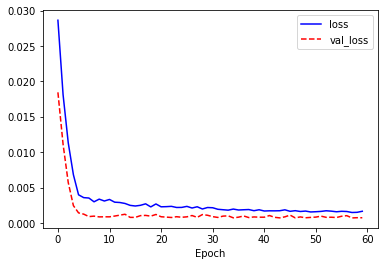

In [ ]:
import matplotlib.pyplot as plt
plt.plot(LT_history.history['loss'], 'b-', label = 'loss')
plt.plot(LT_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# LT 모델 예측율 구하기

In [ ]:
LT_model.evaluate(X[129:], Y[129:])
prediction = LT_model.predict(X[129:129+15])

for i in range(15):
    print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = LT_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.1:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 2ms/step - loss: 0.0013
[0.4  0.07 0.16 0.27 0.02 0.02] 	 [0.3380384  0.05030247 0.09200604 0.25850964 0.05139803 0.046363  ] 	diff: [0.06196159 0.01969753 0.06799396 0.01149036 0.03139803 0.026363  ]
[0.32 0.06 0.1  0.27 0.01 0.01] 	 [0.32817447 0.04780483 0.08805051 0.25402737 0.0495213  0.04439974] 	diff: [0.00817447 0.01219517 0.01194949 0.01597263 0.0395213  0.03439974]
[0.33 0.01 0.07 0.24 0.02 0.02] 	 [0.32356763 0.0463474  0.08631195 0.25194082 0.04809474 0.04252923] 	diff: [0.00643237 0.0363474  0.01631195 0.01194082 0.02809474 0.02252923]
[0.32 0.04 0.11 0.27 0.02 0.02] 	 [0.3270817  0.04742453 0.08781238 0.25369057 0.04915237 0.04356791] 	diff: [0.00708171 0.00742453 0.02218762 0.01630943 0.02915237 0.02356791]
[0.31 0.02 0.06 0.24 0.2  0.2 ] 	 [0.31810543 0.04462284 0.08499722 0.25043002 0.04672333 0.04006623] 	diff: [0.00810543 0.02462284 0.02499722 0.01043002 0.15327667 0.15993377]
[0.31 0.   0.05 0.27 0.04 0.04] 	 [0.33772063 0.0

# LT 모델 저장

In [ ]:
LT_model.save('LT.h5')

In [ ]:
LT_model = load_model('LT.h5')

# LT 예측 범위 구하기

In [ ]:
LT_test = []

for i in range(36):
  LT_test.append(list(LT_20_01.iloc[i]))
  LT_test.append(list(LT_20_02.iloc[i]))
  LT_test.append(list(LT_20_03.iloc[i]))

In [ ]:
LT_test = np.array(LT_test)

In [ ]:
LT_test.shape

(108, 6)

In [ ]:
LT_test = LT_test.reshape(36 ,3, 6)

In [ ]:
LT = LT_model.predict(LT_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
LT[18:]

array([[0.32089972, 0.04537424, 0.08465284, 0.24907109, 0.04778922,
        0.04320242],
       [0.31808704, 0.04519874, 0.085071  , 0.2497524 , 0.04668846,
        0.0409242 ],
       [0.3198949 , 0.04541246, 0.08601974, 0.2513653 , 0.04728907,
        0.04058123],
       [0.3330411 , 0.04809169, 0.08956221, 0.25795183, 0.05008962,
        0.04389628],
       [0.33842573, 0.04972079, 0.09055348, 0.25985947, 0.0516022 ,
        0.04640229],
       [0.32005692, 0.04570927, 0.08414824, 0.24712074, 0.04751013,
        0.04403812],
       [0.3179294 , 0.04493606, 0.08381504, 0.24657863, 0.04702462,
        0.04290399],
       [0.31889644, 0.04533253, 0.08488204, 0.248894  , 0.04691209,
        0.04181675],
       [0.32610178, 0.04694477, 0.08702716, 0.2529684 , 0.04883651,
        0.04353061],
       [0.3239813 , 0.04626989, 0.08772429, 0.25307205, 0.04839452,
        0.04217081],
       [0.32581186, 0.04690519, 0.08788031, 0.25427344, 0.04880032,
        0.04243092],
       [0.32431686, 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
LT_AB = np.sum(LT[18:,0])
LT_HIT = np.sum(LT[18:,2])
LT_AVG = LT_HIT / LT_AB

LT_INN2 = np.sum(LT[18:,3])
LT_ER = np.sum(LT[18:,5])
LT_ERA = (LT_ER * 9) / (LT_INN2 / 3)

LT_total_RUN = np.sum(LT[18:,1]) * 100
LT_total_R = np.sum(LT[18:, 4]) * 100

print("롯데 타율 값 : ", LT_AVG)
print("롯데 방어율 값 : ", LT_ERA)
print("롯데 득점 total : ", LT_total_RUN)
print("롯데 실점 total : ", LT_total_R)

롯데 타율 값 :  0.2677955
롯데 방어율 값 :  4.5640611716803345
롯데 득점 total :  84.03058052062988
롯데 실점 total :  87.23326325416565


# NC 타율, 방어율, 승률 예측

# NC - 불필요한 Column 제거

In [ ]:
del NC_16['VS_T_ID']
del NC_16['T_ID']
del NC_16['GDAY_DS']

del NC_17['VS_T_ID']
del NC_17['T_ID']
del NC_17['GDAY_DS']

del NC_18['VS_T_ID']
del NC_18['T_ID']
del NC_18['GDAY_DS']

del NC_19['VS_T_ID']
del NC_19['T_ID']
del NC_19['GDAY_DS']

del NC_20['VS_T_ID']
del NC_20['T_ID']
del NC_20['GDAY_DS']

# NC - 게임 수로 데이터 쪼개기


In [ ]:

# NC 2016년
NC_16_01 = NC_16[(NC_16['GAME'] >= 1) & (NC_16['GAME'] <= 36)]
NC_16_02 = NC_16[(NC_16['GAME'] >= 37) & (NC_16['GAME'] <= 72)]
NC_16_03 = NC_16[(NC_16['GAME'] >= 73) & (NC_16['GAME'] <= 108)]
NC_16_04 = NC_16[(NC_16['GAME'] >= 109) & (NC_16['GAME'] <= 144)]

# NC 2017년
NC_17_01 = NC_17[(NC_17['GAME'] >= 1) & (NC_17['GAME'] <= 36)]
NC_17_02 = NC_17[(NC_17['GAME'] >= 37) & (NC_17['GAME'] <= 72)]
NC_17_03 = NC_17[(NC_17['GAME'] >= 73) & (NC_17['GAME'] <= 108)]
NC_17_04 = NC_17[(NC_17['GAME'] >= 109) & (NC_17['GAME'] <= 144)]

# NC 2018년
NC_18_01 = NC_18[(NC_18['GAME'] >= 1) & (NC_18['GAME'] <= 36)]
NC_18_02 = NC_18[(NC_18['GAME'] >= 37) & (NC_18['GAME'] <= 72)]
NC_18_03 = NC_18[(NC_18['GAME'] >= 73) & (NC_18['GAME'] <= 108)]
NC_18_04 = NC_18[(NC_18['GAME'] >= 109) & (NC_18['GAME'] <= 144)]

# NC 2019년
NC_19_01 = NC_19[(NC_19['GAME'] >= 1) & (NC_19['GAME'] <= 36)]
NC_19_02 = NC_19[(NC_19['GAME'] >= 37) & (NC_19['GAME'] <= 72)]
NC_19_03 = NC_19[(NC_19['GAME'] >= 73) & (NC_19['GAME'] <= 108)]
NC_19_04 = NC_19[(NC_19['GAME'] >= 109) & (NC_19['GAME'] <= 144)]

# NC 2020년
NC_20_01 = NC_20[(NC_20['GAME'] >= 1) & (NC_20['GAME'] <= 36)]
NC_20_02 = NC_20[(NC_20['GAME'] >= 37) & (NC_20['GAME'] <= 72)]
NC_20_03 = NC_20[(NC_20['GAME'] >= 73) & (NC_20['GAME'] <= 108)]

In [ ]:
del NC_16_01['GAME']
del NC_16_02['GAME']
del NC_16_03['GAME']
del NC_16_04['GAME']

del NC_17_01['GAME']
del NC_17_02['GAME']
del NC_17_03['GAME']
del NC_17_04['GAME']

del NC_18_01['GAME']
del NC_18_02['GAME']
del NC_18_03['GAME']
del NC_18_04['GAME']

del NC_19_01['GAME']
del NC_19_02['GAME']
del NC_19_03['GAME']
del NC_19_04['GAME']

del NC_20_01['GAME']
del NC_20_02['GAME']
del NC_20_03['GAME']

# NC 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(NC_16_01.iloc[i]))
  X.append(list(NC_16_02.iloc[i]))
  X.append(list(NC_16_03.iloc[i]))
  X.append(list(NC_17_01.iloc[i]))
  X.append(list(NC_17_02.iloc[i]))
  X.append(list(NC_17_03.iloc[i]))
  X.append(list(NC_18_01.iloc[i]))
  X.append(list(NC_18_02.iloc[i]))
  X.append(list(NC_18_03.iloc[i]))
  X.append(list(NC_19_01.iloc[i]))
  X.append(list(NC_19_02.iloc[i]))
  X.append(list(NC_19_03.iloc[i]))


for j in range(36):
  Y.append(list(NC_16_04.iloc[j]))
  Y.append(list(NC_17_04.iloc[j]))
  Y.append(list(NC_18_04.iloc[j]))
  Y.append(list(NC_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(432, 6)
(144, 6)


In [ ]:
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
NC_model= tf.keras.Sequential([
                             tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
                             tf.keras.layers.LSTM(units = 30),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(6)
])
NC_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
NC_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_27 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NC_history = NC_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 176ms/step - loss: 0.0347 - val_loss: 0.0274
Epoch 2/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0219 - val_loss: 0.0176
Epoch 3/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0140 - val_loss: 0.0106
Epoch 4/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.0058
Epoch 5/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 6/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 7/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 10/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 11/60
4/4 [====================

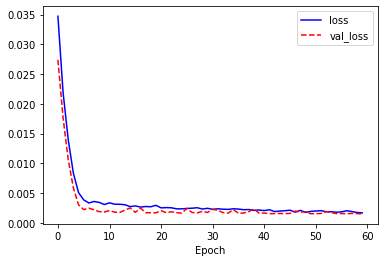

In [ ]:
import matplotlib.pyplot as plt
plt.plot(NC_history.history['loss'], 'b-', label = 'loss')
plt.plot(NC_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# NC 모델 예측율 구하기

In [ ]:
NC_model.evaluate(X[129:], Y[129:])
prediction = NC_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = NC_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.1:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 2ms/step - loss: 0.0015
[0.43 0.11 0.16 0.27 0.01 0.01] 	 [0.34962738 0.05277184 0.10648026 0.26667976 0.05331817 0.04988809] 	diff: [0.08037262 0.05722816 0.05351974 0.00332024 0.04331817 0.03988809]
[0.28 0.06 0.05 0.27 0.05 0.05] 	 [0.3745705  0.05154238 0.11126095 0.27880388 0.05306213 0.05356301] 	diff: [0.09457049 0.00845762 0.06126095 0.00880388 0.00306213 0.00356301]
[0.38 0.02 0.13 0.27 0.04 0.04] 	 [0.3609723  0.0554155  0.11005195 0.27350336 0.05364598 0.0520112 ] 	diff: [0.01902771 0.0354155  0.01994805 0.00350336 0.01364598 0.0120112 ]
[0.26 0.04 0.06 0.27 0.02 0.01] 	 [0.37455004 0.05290459 0.11278103 0.28171116 0.05470875 0.05251154] 	diff: [0.11455004 0.01290459 0.05278103 0.01171116 0.03470875 0.04251154]
[0.37 0.08 0.12 0.27 0.04 0.04] 	 [0.36906147 0.05629048 0.111295   0.2776596  0.05349016 0.05240216] 	diff: [0.00093853 0.02370952 0.008705   0.0076596  0.01349016 0.01240216]
[0.36 0.02 0.09 0.27 0.08 0.07] 	 [0.37589657 0.0

# NC 모델 저장

In [ ]:
NC_model.save('NC.h5')
NC_model = load_model('NC.h5')

# NC 예측 범위 구하기

In [ ]:
NC_test = []

for i in range(36):
  NC_test.append(list(NC_20_01.iloc[i]))
  NC_test.append(list(NC_20_02.iloc[i]))
  NC_test.append(list(NC_20_03.iloc[i]))

In [ ]:
NC_test = np.array(NC_test)
NC_test.shape
NC_test = NC_test.reshape(36 ,3, 6)

In [ ]:
NC = NC_model.predict(NC_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
NC[20:]

array([[0.3716693 , 0.05565268, 0.11232319, 0.28027332, 0.05431538,
        0.05253311],
       [0.35814142, 0.05528005, 0.11019002, 0.27130717, 0.05354359,
        0.0524478 ],
       [0.38298988, 0.05072355, 0.11366376, 0.28265622, 0.05297559,
        0.05489282],
       [0.37301326, 0.05536284, 0.11201499, 0.28013557, 0.05380492,
        0.052058  ],
       [0.36967885, 0.05454456, 0.11126658, 0.2787164 , 0.05387667,
        0.05218462],
       [0.36481297, 0.04992677, 0.10892127, 0.27392125, 0.05333347,
        0.05207387],
       [0.37520486, 0.05112342, 0.11192088, 0.27954388, 0.05322042,
        0.05262527],
       [0.3803959 , 0.05137698, 0.11348102, 0.2832477 , 0.05386141,
        0.05452491],
       [0.36561716, 0.05174439, 0.11033785, 0.27390683, 0.05347472,
        0.05246947],
       [0.36672375, 0.05282129, 0.11082069, 0.276421  , 0.0532179 ,
        0.05299772],
       [0.36329484, 0.05509616, 0.11057824, 0.2744382 , 0.05367905,
        0.05260222],
       [0.37559164, 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
NC_AB = np.sum(NC[20:,0])
NC_HIT = np.sum(NC[20:,2])
NC_AVG = NC_HIT / NC_AB

NC_INN2 = np.sum(NC[20:,3])
NC_ER = np.sum(NC[20:,5])
NC_ERA = (NC_ER * 9) / (NC_INN2 / 3)

NC_total_RUN = np.sum(NC[20:,1]) * 100
NC_total_R = np.sum(NC[20:, 4]) * 100

print("NC 타율 값 : ", NC_AVG)
print("NC 방어율 값 : ", NC_ERA)
print("NC 득점 total : ", NC_total_RUN)
print("NC 실점 total : ", NC_total_R)

NC 타율 값 :  0.30084404
NC 방어율 값 :  5.149494046899442
NC 득점 total :  85.46980023384094
NC 실점 total :  85.79015731811523


# OB 타율, 방어율, 승률 예측

# OB - 불필요한 Column 제거

In [ ]:
del OB_16['VS_T_ID']
del OB_16['T_ID']
del OB_16['GDAY_DS']

del OB_17['VS_T_ID']
del OB_17['T_ID']
del OB_17['GDAY_DS']

del OB_18['VS_T_ID']
del OB_18['T_ID']
del OB_18['GDAY_DS']

del OB_19['VS_T_ID']
del OB_19['T_ID']
del OB_19['GDAY_DS']

del OB_20['VS_T_ID']
del OB_20['T_ID']
del OB_20['GDAY_DS']

# OB - 게임 수로 데이터 쪼개기

In [ ]:
# OB 2016년
OB_16_01 = OB_16[(OB_16['GAME'] >= 1) & (OB_16['GAME'] <= 36)]
OB_16_02 = OB_16[(OB_16['GAME'] >= 37) & (OB_16['GAME'] <= 72)]
OB_16_03 = OB_16[(OB_16['GAME'] >= 73) & (OB_16['GAME'] <= 108)]
OB_16_04 = OB_16[(OB_16['GAME'] >= 109) & (OB_16['GAME'] <= 144)]

# OB 2017년
OB_17_01 = OB_17[(OB_17['GAME'] >= 1) & (OB_17['GAME'] <= 36)]
OB_17_02 = OB_17[(OB_17['GAME'] >= 37) & (OB_17['GAME'] <= 72)]
OB_17_03 = OB_17[(OB_17['GAME'] >= 73) & (OB_17['GAME'] <= 108)]
OB_17_04 = OB_17[(OB_17['GAME'] >= 109) & (OB_17['GAME'] <= 144)]

# OB 2018년
OB_18_01 = OB_18[(OB_18['GAME'] >= 1) & (OB_18['GAME'] <= 36)]
OB_18_02 = OB_18[(OB_18['GAME'] >= 37) & (OB_18['GAME'] <= 72)]
OB_18_03 = OB_18[(OB_18['GAME'] >= 73) & (OB_18['GAME'] <= 108)]
OB_18_04 = OB_18[(OB_18['GAME'] >= 109) & (OB_18['GAME'] <= 144)]

# OB 2019년
OB_19_01 = OB_19[(OB_19['GAME'] >= 1) & (OB_19['GAME'] <= 36)]
OB_19_02 = OB_19[(OB_19['GAME'] >= 37) & (OB_19['GAME'] <= 72)]
OB_19_03 = OB_19[(OB_19['GAME'] >= 73) & (OB_19['GAME'] <= 108)]
OB_19_04 = OB_19[(OB_19['GAME'] >= 109) & (OB_19['GAME'] <= 144)]

# OB 2020년
OB_20_01 = OB_20[(OB_20['GAME'] >= 1) & (OB_20['GAME'] <= 36)]
OB_20_02 = OB_20[(OB_20['GAME'] >= 37) & (OB_20['GAME'] <= 72)]
OB_20_03 = OB_20[(OB_20['GAME'] >= 73) & (OB_20['GAME'] <= 108)]
OB_20_04 = OB_20[(OB_20['GAME'] >= 109) & (OB_20['GAME'] <= 144)]

In [ ]:
del OB_16_01['GAME']
del OB_16_02['GAME']
del OB_16_03['GAME']
del OB_16_04['GAME']

del OB_17_01['GAME']
del OB_17_02['GAME']
del OB_17_03['GAME']
del OB_17_04['GAME']

del OB_18_01['GAME']
del OB_18_02['GAME']
del OB_18_03['GAME']
del OB_18_04['GAME']

del OB_19_01['GAME']
del OB_19_02['GAME']
del OB_19_03['GAME']
del OB_19_04['GAME']

del OB_20_01['GAME']
del OB_20_02['GAME']
del OB_20_03['GAME']
del OB_20_04['GAME']

# OB 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(OB_16_01.iloc[i]))
  X.append(list(OB_16_02.iloc[i]))
  X.append(list(OB_16_03.iloc[i]))
  X.append(list(OB_17_01.iloc[i]))
  X.append(list(OB_17_02.iloc[i]))
  X.append(list(OB_17_03.iloc[i]))
  X.append(list(OB_18_01.iloc[i]))
  X.append(list(OB_18_02.iloc[i]))
  X.append(list(OB_18_03.iloc[i]))
  X.append(list(OB_19_01.iloc[i]))
  X.append(list(OB_19_02.iloc[i]))
  X.append(list(OB_19_03.iloc[i]))


for j in range(36):
  Y.append(list(OB_16_04.iloc[j]))
  Y.append(list(OB_17_04.iloc[j]))
  Y.append(list(OB_18_04.iloc[j]))
  Y.append(list(OB_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(432, 6)
(144, 6)


In [ ]:
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
OB_model= tf.keras.Sequential([
                             tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
                             tf.keras.layers.LSTM(units = 30),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(6)
])

OB_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
OB_model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_29 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_14 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
OB_history = OB_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 179ms/step - loss: 0.0291 - val_loss: 0.0210
Epoch 2/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0178 - val_loss: 0.0120
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0101 - val_loss: 0.0058
Epoch 4/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0058 - val_loss: 0.0029
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 6/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 7/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 10/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 11/60
4/4 [====================

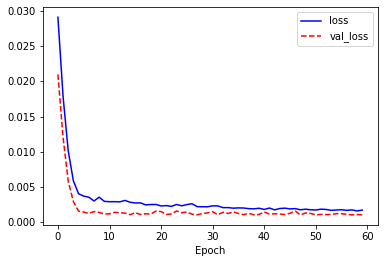

In [ ]:
import matplotlib.pyplot as plt
plt.plot(OB_history.history['loss'], 'b-', label = 'loss')
plt.plot(OB_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# OB 예측율 구하기

In [ ]:
OB_model.evaluate(X[129:], Y[129:])
prediction = OB_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = OB_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.06:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 2ms/step - loss: 0.0014
[0.4  0.07 0.16 0.27 0.02 0.02] 	 [0.37101555 0.07394823 0.11519039 0.2880151  0.04440041 0.04323736] 	diff: [0.02898445 0.00394823 0.04480961 0.0180151  0.02440041 0.02323736]
[0.32 0.06 0.1  0.27 0.01 0.01] 	 [0.3595164  0.07004376 0.1132237  0.2787387  0.04272094 0.04248986] 	diff: [0.03951641 0.01004376 0.0132237  0.00873871 0.03272094 0.03248986]
[0.33 0.01 0.07 0.24 0.02 0.02] 	 [0.35114327 0.06830204 0.11215918 0.27167103 0.04219378 0.04196853] 	diff: [0.02114327 0.05830204 0.04215918 0.03167103 0.02219378 0.02196853]
[0.32 0.04 0.11 0.27 0.02 0.02] 	 [0.35597092 0.0697896  0.1120971  0.27623862 0.04327692 0.04236795] 	diff: [0.03597092 0.0297896  0.0020971  0.00623862 0.02327692 0.02236795]
[0.31 0.02 0.06 0.24 0.2  0.2 ] 	 [0.340577   0.06573236 0.11022288 0.26160154 0.04197138 0.04032914] 	diff: [0.03057701 0.04573236 0.05022288 0.02160154 0.15802862 0.15967086]
[0.31 0.   0.05 0.27 0.04 0.04] 	 [0.36842778 0.0

# OB 모델 저장

In [ ]:
OB_model.save('OB.h5')
OB_model = load_model('OB.h5')

# OB 예측 범위 구하기

In [ ]:
OB_test = []

for i in range(36):
  OB_test.append(list(OB_20_01.iloc[i]))
  OB_test.append(list(OB_20_02.iloc[i]))
  OB_test.append(list(OB_20_03.iloc[i]))

In [ ]:
OB_test = np.array(OB_test)
OB_test.shape

(108, 6)

In [ ]:
OB_test = OB_test.reshape(36 ,3, 6)

OB = OB_model.predict(OB_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
OB[18:]

array([[0.35832414, 0.07014702, 0.11370714, 0.27762958, 0.04268422,
        0.04175815],
       [0.34348422, 0.06629392, 0.11042842, 0.2655542 , 0.04213662,
        0.04057825],
       [0.3500332 , 0.06837194, 0.11142538, 0.27087215, 0.04280863,
        0.04156427],
       [0.3648737 , 0.07232313, 0.11475098, 0.2831758 , 0.04323315,
        0.04325511],
       [0.37003726, 0.07245931, 0.11724332, 0.28511176, 0.0422603 ,
        0.0427448 ],
       [0.364329  , 0.07212059, 0.11377329, 0.28002873, 0.04423464,
        0.04262414],
       [0.3436233 , 0.06668459, 0.11029301, 0.26467314, 0.04259655,
        0.04062331],
       [0.36135617, 0.07074328, 0.11404198, 0.28030142, 0.04256237,
        0.04340118],
       [0.3429222 , 0.06670421, 0.10916398, 0.2650516 , 0.04324187,
        0.04096761],
       [0.34777623, 0.06777328, 0.11071174, 0.26898998, 0.04275493,
        0.04156513],
       [0.3493595 , 0.06849724, 0.11105511, 0.27056086, 0.0429404 ,
        0.04161049],
       [0.3566261 , 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
OB_AB = np.sum(OB[18:,0])
OB_HIT = np.sum(OB[18:,2])
OB_AVG = OB_HIT / OB_AB

OB_INN2 = np.sum(OB[18:,3])
OB_ER = np.sum(OB[18:,5])
OB_ERA = (OB_ER * 9) / (OB_INN2 / 3)

OB_total_RUN = np.sum(OB[18:,1]) * 100
OB_total_R = np.sum(OB[18:, 4]) * 100

print("두산 타율 값 : ", OB_AVG)
print("두산 방어율 값 : ", OB_ERA)
print("두산 득점 total : ", OB_total_RUN)
print("두산 실점 total : ", OB_total_R)

두산 타율 값 :  0.31774375
두산 방어율 값 :  4.126150993802218
두산 득점 total :  124.80649948120117
두산 실점 total :  76.86915397644043


# WO 타율, 방어율, 승률 예측

# WO - 불필요한 Column 제거

In [ ]:
del WO_16['VS_T_ID']
del WO_16['T_ID']
del WO_16['GDAY_DS']

del WO_17['VS_T_ID']
del WO_17['T_ID']
del WO_17['GDAY_DS']

del WO_18['VS_T_ID']
del WO_18['T_ID']
del WO_18['GDAY_DS']

del WO_19['VS_T_ID']
del WO_19['T_ID']
del WO_19['GDAY_DS']

del WO_20['VS_T_ID']
del WO_20['T_ID']
del WO_20['GDAY_DS']

# WO - 게임 수로 데이터 쪼개기

In [ ]:
# WO 2016년
WO_16_01 = WO_16[(WO_16['GAME'] >= 1) & (WO_16['GAME'] <= 36)]
WO_16_02 = WO_16[(WO_16['GAME'] >= 37) & (WO_16['GAME'] <= 72)]
WO_16_03 = WO_16[(WO_16['GAME'] >= 73) & (WO_16['GAME'] <= 108)]
WO_16_04 = WO_16[(WO_16['GAME'] >= 109) & (WO_16['GAME'] <= 144)]

# WO 2017년
WO_17_01 = WO_17[(WO_17['GAME'] >= 1) & (WO_17['GAME'] <= 36)]
WO_17_02 = WO_17[(WO_17['GAME'] >= 37) & (WO_17['GAME'] <= 72)]
WO_17_03 = WO_17[(WO_17['GAME'] >= 73) & (WO_17['GAME'] <= 108)]
WO_17_04 = WO_17[(WO_17['GAME'] >= 109) & (WO_17['GAME'] <= 144)]

# WO 2018년
WO_18_01 = WO_18[(WO_18['GAME'] >= 1) & (WO_18['GAME'] <= 36)]
WO_18_02 = WO_18[(WO_18['GAME'] >= 37) & (WO_18['GAME'] <= 72)]
WO_18_03 = WO_18[(WO_18['GAME'] >= 73) & (WO_18['GAME'] <= 108)]
WO_18_04 = WO_18[(WO_18['GAME'] >= 109) & (WO_18['GAME'] <= 144)]

# WO 2019년
WO_19_01 = WO_19[(WO_19['GAME'] >= 1) & (WO_19['GAME'] <= 36)]
WO_19_02 = WO_19[(WO_19['GAME'] >= 37) & (WO_19['GAME'] <= 72)]
WO_19_03 = WO_19[(WO_19['GAME'] >= 73) & (WO_19['GAME'] <= 108)]
WO_19_04 = WO_19[(WO_19['GAME'] >= 109) & (WO_19['GAME'] <= 144)]

# WO 2020년
WO_20_01 = WO_20[(WO_20['GAME'] >= 1) & (WO_20['GAME'] <= 36)]
WO_20_02 = WO_20[(WO_20['GAME'] >= 37) & (WO_20['GAME'] <= 72)]
WO_20_03 = WO_20[(WO_20['GAME'] >= 73) & (WO_20['GAME'] <= 108)]


In [ ]:
del WO_16_01['GAME']
del WO_16_02['GAME']
del WO_16_03['GAME']
del WO_16_04['GAME']

del WO_17_01['GAME']
del WO_17_02['GAME']
del WO_17_03['GAME']
del WO_17_04['GAME']

del WO_18_01['GAME']
del WO_18_02['GAME']
del WO_18_03['GAME']
del WO_18_04['GAME']

del WO_19_01['GAME']
del WO_19_02['GAME']
del WO_19_03['GAME']
del WO_19_04['GAME']

del WO_20_01['GAME']
del WO_20_02['GAME']
del WO_20_03['GAME']

# WO 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(WO_16_01.iloc[i]))
  X.append(list(WO_16_02.iloc[i]))
  X.append(list(WO_16_03.iloc[i]))
  X.append(list(WO_17_01.iloc[i]))
  X.append(list(WO_17_02.iloc[i]))
  X.append(list(WO_17_03.iloc[i]))
  X.append(list(WO_18_01.iloc[i]))
  X.append(list(WO_18_02.iloc[i]))
  X.append(list(WO_18_03.iloc[i]))
  X.append(list(WO_19_01.iloc[i]))
  X.append(list(WO_19_02.iloc[i]))
  X.append(list(WO_19_03.iloc[i]))


for j in range(36):
  Y.append(list(WO_16_04.iloc[j]))
  Y.append(list(WO_17_04.iloc[j]))
  Y.append(list(WO_18_04.iloc[j]))
  Y.append(list(WO_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(432, 6)
(144, 6)


In [ ]:
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
WO_model= tf.keras.Sequential([
                             tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
                             tf.keras.layers.LSTM(units = 30),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(6)
])

WO_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
WO_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_31 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
WO_history = WO_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 185ms/step - loss: 0.0322 - val_loss: 0.0213
Epoch 2/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0209 - val_loss: 0.0126
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.0065
Epoch 4/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 6/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 7/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 8.7826e-04
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 10/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 8.8374e-04
Epoch 11/60
4/4 [============

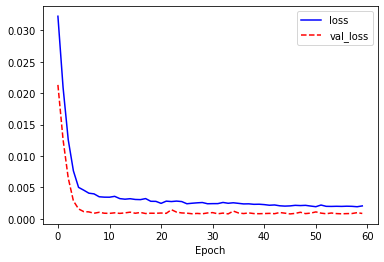

In [ ]:
import matplotlib.pyplot as plt
plt.plot(WO_history.history['loss'], 'b-', label = 'loss')
plt.plot(WO_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# WO 모델 예측율 구하기

In [ ]:
WO_model.evaluate(X[129:], Y[129:])
prediction = WO_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = WO_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.06:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 1ms/step - loss: 0.0013
[0.4  0.07 0.16 0.27 0.02 0.02] 	 [0.35226324 0.0614707  0.10197183 0.27243072 0.05571155 0.04850712] 	diff: [0.04773676 0.0085293  0.05802817 0.00243072 0.03571155 0.02850712]
[0.32 0.06 0.1  0.27 0.01 0.01] 	 [0.34788615 0.06062936 0.10210826 0.26889887 0.05325471 0.04715233] 	diff: [0.02788615 0.00062936 0.00210826 0.00110113 0.04325471 0.03715233]
[0.33 0.01 0.07 0.24 0.02 0.02] 	 [0.34548053 0.05991657 0.10112686 0.2688555  0.05108494 0.04694662] 	diff: [0.01548053 0.04991657 0.03112686 0.02885551 0.03108494 0.02694662]
[0.32 0.04 0.11 0.27 0.02 0.02] 	 [0.34883636 0.05945306 0.10209797 0.2697528  0.05240795 0.04732667] 	diff: [0.02883636 0.01945306 0.00790203 0.0002472  0.03240795 0.02732667]
[0.31 0.02 0.06 0.24 0.2  0.2 ] 	 [0.34091553 0.0603951  0.10097974 0.26617062 0.04985776 0.04520881] 	diff: [0.03091553 0.0403951  0.04097974 0.02617062 0.15014224 0.15479119]
[0.31 0.   0.05 0.27 0.04 0.04] 	 [0.35223716 0.0

# WO 모델 저장

In [ ]:
WO_model.save('WO.h5')
WO_model = load_model('WO.h5')

# WO 예측 범위 구하기

In [ ]:
WO_test = []

for i in range(36):
  WO_test.append(list(WO_20_01.iloc[i]))
  WO_test.append(list(WO_20_02.iloc[i]))
  WO_test.append(list(WO_20_03.iloc[i]))

In [ ]:
WO_test = np.array(WO_test)
WO_test.shape

WO_test = WO_test.reshape(36 ,3, 6)

WO = WO_model.predict(WO_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
WO[18:]

array([[0.34226012, 0.0610561 , 0.10133225, 0.26687914, 0.04972944,
        0.04591435],
       [0.3445149 , 0.0614752 , 0.10113453, 0.26798564, 0.05253608,
        0.04654222],
       [0.34596297, 0.06163153, 0.10104096, 0.269199  , 0.05336187,
        0.04704945],
       [0.35061273, 0.06053694, 0.10347317, 0.27210826, 0.0516764 ,
        0.04716378],
       [0.34899092, 0.06093075, 0.10130356, 0.2711252 , 0.05376258,
        0.04817645],
       [0.35087663, 0.06134557, 0.10198599, 0.2734557 , 0.05206958,
        0.04863537],
       [0.34911072, 0.05943149, 0.10180929, 0.2697037 , 0.053363  ,
        0.0476513 ],
       [0.3463868 , 0.05989907, 0.10202792, 0.2687443 , 0.05128125,
        0.04655299],
       [0.34723815, 0.06131737, 0.10225932, 0.27049124, 0.05185942,
        0.04681615],
       [0.34566122, 0.06040883, 0.1011392 , 0.26862454, 0.0518212 ,
        0.04709461],
       [0.34512073, 0.05957252, 0.10201752, 0.2680704 , 0.05045043,
        0.04614015],
       [0.34227055, 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
WO_AB = np.sum(WO[18:,0])
WO_HIT = np.sum(WO[18:,2])
WO_AVG = WO_HIT / WO_AB

WO_INN2 = np.sum(WO[18:,3])
WO_ER = np.sum(WO[18:,5])
WO_ERA = (WO_ER * 9) / (WO_INN2 / 3)

WO_total_RUN = np.sum(WO[18:,1]) * 100
WO_total_R = np.sum(WO[18:, 4]) * 100

print("키움 타율 값 : ", WO_AVG)
print("키움 방어율 값 : ", WO_ERA)
print("키움 득점 total : ", WO_total_RUN)
print("키움 실점 total : ", WO_total_R)

키움 타율 값 :  0.29344612
키움 방어율 값 :  4.706407110683495
키움 득점 total :  108.89514684677124
키움 실점 total :  92.9521381855011


# KT 타율, 방어율, 승률 예측

# KT - 불필요한 Column 제거

In [ ]:
del KT_16['VS_T_ID']
del KT_16['T_ID']
del KT_16['GDAY_DS']

del KT_17['VS_T_ID']
del KT_17['T_ID']
del KT_17['GDAY_DS']

del KT_18['VS_T_ID']
del KT_18['T_ID']
del KT_18['GDAY_DS']

del KT_19['VS_T_ID']
del KT_19['T_ID']
del KT_19['GDAY_DS']

del KT_20['VS_T_ID']
del KT_20['T_ID']
del KT_20['GDAY_DS']

# KT - 게임 수로 데이터 쪼개기

In [ ]:

# KT 2016년
KT_16_01 = KT_16[(KT_16['GAME'] >= 1) & (KT_16['GAME'] <= 36)]
KT_16_02 = KT_16[(KT_16['GAME'] >= 37) & (KT_16['GAME'] <= 72)]
KT_16_03 = KT_16[(KT_16['GAME'] >= 73) & (KT_16['GAME'] <= 108)]
KT_16_04 = KT_16[(KT_16['GAME'] >= 109) & (KT_16['GAME'] <= 144)]

# KT 2017년
KT_17_01 = KT_17[(KT_17['GAME'] >= 1) & (KT_17['GAME'] <= 36)]
KT_17_02 = KT_17[(KT_17['GAME'] >= 37) & (KT_17['GAME'] <= 72)]
KT_17_03 = KT_17[(KT_17['GAME'] >= 73) & (KT_17['GAME'] <= 108)]
KT_17_04 = KT_17[(KT_17['GAME'] >= 109) & (KT_17['GAME'] <= 144)]

# KT 2018년
KT_18_01 = KT_18[(KT_18['GAME'] >= 1) & (KT_18['GAME'] <= 36)]
KT_18_02 = KT_18[(KT_18['GAME'] >= 37) & (KT_18['GAME'] <= 72)]
KT_18_03 = KT_18[(KT_18['GAME'] >= 73) & (KT_18['GAME'] <= 108)]
KT_18_04 = KT_18[(KT_18['GAME'] >= 109) & (KT_18['GAME'] <= 144)]

# KT 2019년
KT_19_01 = KT_19[(KT_19['GAME'] >= 1) & (KT_19['GAME'] <= 36)]
KT_19_02 = KT_19[(KT_19['GAME'] >= 37) & (KT_19['GAME'] <= 72)]
KT_19_03 = KT_19[(KT_19['GAME'] >= 73) & (KT_19['GAME'] <= 108)]
KT_19_04 = KT_19[(KT_19['GAME'] >= 109) & (KT_19['GAME'] <= 144)]

# KT 2020년
KT_20_01 = KT_20[(KT_20['GAME'] >= 1) & (KT_20['GAME'] <= 36)]
KT_20_02 = KT_20[(KT_20['GAME'] >= 37) & (KT_20['GAME'] <= 72)]
KT_20_03 = KT_20[(KT_20['GAME'] >= 73) & (KT_20['GAME'] <= 108)]

In [ ]:
del KT_16_01['GAME']
del KT_16_02['GAME']
del KT_16_03['GAME']
del KT_16_04['GAME']

del KT_17_01['GAME']
del KT_17_02['GAME']
del KT_17_03['GAME']
del KT_17_04['GAME']

del KT_18_01['GAME']
del KT_18_02['GAME']
del KT_18_03['GAME']
del KT_18_04['GAME']

del KT_19_01['GAME']
del KT_19_02['GAME']
del KT_19_03['GAME']
del KT_19_04['GAME']

del KT_20_01['GAME']
del KT_20_02['GAME']
del KT_20_03['GAME']

# KT 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(KT_16_01.iloc[i]))
  X.append(list(KT_16_02.iloc[i]))
  X.append(list(KT_16_03.iloc[i]))
  X.append(list(KT_17_01.iloc[i]))
  X.append(list(KT_17_02.iloc[i]))
  X.append(list(KT_17_03.iloc[i]))
  X.append(list(KT_18_01.iloc[i]))
  X.append(list(KT_18_02.iloc[i]))
  X.append(list(KT_18_03.iloc[i]))
  X.append(list(KT_19_01.iloc[i]))
  X.append(list(KT_19_02.iloc[i]))
  X.append(list(KT_19_03.iloc[i]))


for j in range(36):
  Y.append(list(KT_16_04.iloc[j]))
  Y.append(list(KT_17_04.iloc[j]))
  Y.append(list(KT_18_04.iloc[j]))
  Y.append(list(KT_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)


(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
KT_model= tf.keras.Sequential([
                               tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
                               tf.keras.layers.LSTM(units = 30),
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(6)])

KT_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
KT_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_33 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
KT_history = KT_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 187ms/step - loss: 0.0340 - val_loss: 0.0295
Epoch 2/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0250 - val_loss: 0.0221
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0186 - val_loss: 0.0155
Epoch 4/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0129 - val_loss: 0.0098
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0059
Epoch 6/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 7/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 10/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 11/60
4/4 [====================

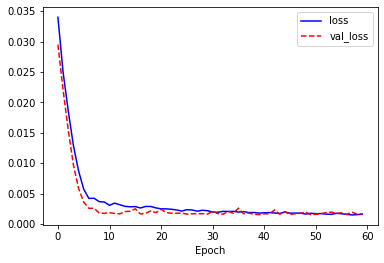

In [ ]:
import matplotlib.pyplot as plt
plt.plot(KT_history.history['loss'], 'b-', label = 'loss')
plt.plot(KT_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# KT 모델 예측율 구하기

In [ ]:
KT_model.evaluate(X[129:], Y[129:])
prediction = KT_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = KT_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.1:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 2ms/step - loss: 0.0017
[0.34 0.06 0.12 0.27 0.15 0.15] 	 [0.34849846 0.05299605 0.10480645 0.26587415 0.07088338 0.05722515] 	diff: [0.00849846 0.00700395 0.01519355 0.00412585 0.07911662 0.09277485]
[0.41 0.1  0.12 0.27 0.01 0.01] 	 [0.3442487  0.05596096 0.10163192 0.26282436 0.06643525 0.05515521] 	diff: [0.06575129 0.04403904 0.01836808 0.00717564 0.05643525 0.04515521]
[0.34 0.07 0.14 0.27 0.03 0.01] 	 [0.33574757 0.05567436 0.09829979 0.2545463  0.06263231 0.05332147] 	diff: [0.00425243 0.01432564 0.04170021 0.01545369 0.03263231 0.04332147]
[0.33 0.02 0.09 0.27 0.07 0.07] 	 [0.34757403 0.05250596 0.10395584 0.26546514 0.06956923 0.05740154] 	diff: [0.01757403 0.03250596 0.01395584 0.00453486 0.00043077 0.01259846]
[0.48 0.2  0.25 0.27 0.02 0.02] 	 [0.3362913  0.05501305 0.09660411 0.2536664  0.05955349 0.05315903] 	diff: [0.14370869 0.14498695 0.15339589 0.0163336  0.03955349 0.03315903]
[0.35 0.07 0.08 0.27 0.   0.  ] 	 [0.3486411  0.0

# KT 모델 저장

In [ ]:
KT_model.save('KT.h5')
KT_model = load_model('KT.h5')

# KT 예측범위 구하기

In [ ]:
KT_test = []

for i in range(36):
  KT_test.append(list(KT_20_01.iloc[i]))
  KT_test.append(list(KT_20_02.iloc[i]))
  KT_test.append(list(KT_20_03.iloc[i]))

In [ ]:
KT_test = np.array(KT_test)
KT_test.shape

KT_test = KT_test.reshape(36 ,3, 6)

KT = KT_model.predict(KT_test)


In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
KT[19:]

array([[0.34586102, 0.05333317, 0.10277931, 0.26332694, 0.06803505,
        0.05637134],
       [0.33953008, 0.05396779, 0.10029324, 0.25847733, 0.06518701,
        0.05493047],
       [0.3496226 , 0.05302311, 0.1037345 , 0.26469824, 0.06881614,
        0.05698641],
       [0.34154576, 0.05398995, 0.09891176, 0.2576486 , 0.06319611,
        0.05458186],
       [0.35116112, 0.05310103, 0.10371646, 0.26713133, 0.06850534,
        0.05701811],
       [0.33821768, 0.05525485, 0.09838524, 0.25606143, 0.06246058,
        0.05370334],
       [0.35501122, 0.05459168, 0.1041366 , 0.27116042, 0.06855334,
        0.05698768],
       [0.34275627, 0.05379031, 0.10269307, 0.26111844, 0.06842187,
        0.05599198],
       [0.33920398, 0.05472494, 0.10208555, 0.25978798, 0.06822647,
        0.05523229],
       [0.34545323, 0.0543812 , 0.10237965, 0.26325175, 0.06731468,
        0.05590082],
       [0.34071952, 0.05530194, 0.1014583 , 0.26018542, 0.06700353,
        0.05507355],
       [0.3345278 , 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
KT_AB = np.sum(KT[19:,0])
KT_HIT = np.sum(KT[19:,2])
KT_AVG = KT_HIT / KT_AB

KT_INN2 = np.sum(KT[19:,3])
KT_ER = np.sum(KT[19:,5])
KT_ERA = (KT_ER * 9) / (KT_INN2 / 3)

KT_total_RUN = np.sum(KT[19:,1]) * 100
KT_total_R = np.sum(KT[19:, 4]) * 100

print("KT 타율 값 : ", KT_AVG)
print("KT 방어율 값 : ", KT_ERA)
print("KT 득점 total : ", KT_total_RUN)
print("KT 실점 total : ", KT_total_R)

KT 타율 값 :  0.29529077
KT 방어율 값 :  5.738726618265638
KT 득점 total :  92.0037031173706
KT 실점 total :  112.94229030609131


# LG 타율, 방어율, 승률 예측

# LG - 불필요한 Column 제거

In [ ]:
del LG_16['VS_T_ID']
del LG_16['T_ID']
del LG_16['GDAY_DS']

del LG_17['VS_T_ID']
del LG_17['T_ID']
del LG_17['GDAY_DS']

del LG_18['VS_T_ID']
del LG_18['T_ID']
del LG_18['GDAY_DS']

del LG_19['VS_T_ID']
del LG_19['T_ID']
del LG_19['GDAY_DS']

del LG_20['VS_T_ID']
del LG_20['T_ID']
del LG_20['GDAY_DS']

# LG - 게임 수로 데이터 쪼개기

In [ ]:
# LG 2016년
LG_16_01 = LG_16[(LG_16['GAME'] >= 1) & (LG_16['GAME'] <= 36)]
LG_16_02 = LG_16[(LG_16['GAME'] >= 37) & (LG_16['GAME'] <= 72)]
LG_16_03 = LG_16[(LG_16['GAME'] >= 73) & (LG_16['GAME'] <= 108)]
LG_16_04 = LG_16[(LG_16['GAME'] >= 109) & (LG_16['GAME'] <= 144)]

# LG 2017년
LG_17_01 = LG_17[(LG_17['GAME'] >= 1) & (LG_17['GAME'] <= 36)]
LG_17_02 = LG_17[(LG_17['GAME'] >= 37) & (LG_17['GAME'] <= 72)]
LG_17_03 = LG_17[(LG_17['GAME'] >= 73) & (LG_17['GAME'] <= 108)]
LG_17_04 = LG_17[(LG_17['GAME'] >= 109) & (LG_17['GAME'] <= 144)]

# LG 2018년
LG_18_01 = LG_18[(LG_18['GAME'] >= 1) & (LG_18['GAME'] <= 36)]
LG_18_02 = LG_18[(LG_18['GAME'] >= 37) & (LG_18['GAME'] <= 72)]
LG_18_03 = LG_18[(LG_18['GAME'] >= 73) & (LG_18['GAME'] <= 108)]
LG_18_04 = LG_18[(LG_18['GAME'] >= 109) & (LG_18['GAME'] <= 144)]

# LG 2019년
LG_19_01 = LG_19[(LG_19['GAME'] >= 1) & (LG_19['GAME'] <= 36)]
LG_19_02 = LG_19[(LG_19['GAME'] >= 37) & (LG_19['GAME'] <= 72)]
LG_19_03 = LG_19[(LG_19['GAME'] >= 73) & (LG_19['GAME'] <= 108)]
LG_19_04 = LG_19[(LG_19['GAME'] >= 109) & (LG_19['GAME'] <= 144)]

# LG 2020년
LG_20_01 = LG_20[(LG_20['GAME'] >= 1) & (LG_20['GAME'] <= 36)]
LG_20_02 = LG_20[(LG_20['GAME'] >= 37) & (LG_20['GAME'] <= 72)]
LG_20_03 = LG_20[(LG_20['GAME'] >= 73) & (LG_20['GAME'] <= 108)]

In [ ]:
del LG_16_01['GAME']
del LG_16_02['GAME']
del LG_16_03['GAME']
del LG_16_04['GAME']

del LG_17_01['GAME']
del LG_17_02['GAME']
del LG_17_03['GAME']
del LG_17_04['GAME']

del LG_18_01['GAME']
del LG_18_02['GAME']
del LG_18_03['GAME']
del LG_18_04['GAME']

del LG_19_01['GAME']
del LG_19_02['GAME']
del LG_19_03['GAME']
del LG_19_04['GAME']

del LG_20_01['GAME']
del LG_20_02['GAME']
del LG_20_03['GAME']

# LG 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(LG_16_01.iloc[i]))
  X.append(list(LG_16_02.iloc[i]))
  X.append(list(LG_16_03.iloc[i]))
  X.append(list(LG_17_01.iloc[i]))
  X.append(list(LG_17_02.iloc[i]))
  X.append(list(LG_17_03.iloc[i]))
  X.append(list(LG_18_01.iloc[i]))
  X.append(list(LG_18_02.iloc[i]))
  X.append(list(LG_18_03.iloc[i]))
  X.append(list(LG_19_01.iloc[i]))
  X.append(list(LG_19_02.iloc[i]))
  X.append(list(LG_19_03.iloc[i]))


for j in range(36):
  Y.append(list(LG_16_04.iloc[j]))
  Y.append(list(LG_17_04.iloc[j]))
  Y.append(list(LG_18_04.iloc[j]))
  Y.append(list(LG_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
LG_model= tf.keras.Sequential([
  tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
  tf.keras.layers.LSTM(units = 30),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6)
  ])

LG_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
LG_model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_35 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LG_history = LG_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 180ms/step - loss: 0.0306 - val_loss: 0.0194
Epoch 2/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0215 - val_loss: 0.0129
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0148 - val_loss: 0.0075
Epoch 4/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.0039
Epoch 5/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0018
Epoch 6/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 7/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 9.8720e-04
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 9.2699e-04
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 9.9610e-04
Epoch 10/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 11/60
4/4 [========

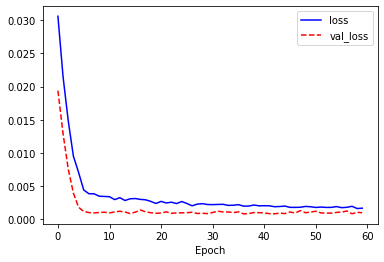

In [ ]:
import matplotlib.pyplot as plt
plt.plot(LG_history.history['loss'], 'b-', label = 'loss')
plt.plot(LG_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# LG 모델 예측율 구하기

In [ ]:
LG_model.evaluate(X[129:], Y[129:])
prediction = LG_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = LG_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.06:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 1ms/step - loss: 0.0012
[0.4  0.07 0.16 0.27 0.02 0.02] 	 [0.35048455 0.05078479 0.10189667 0.27155602 0.04934219 0.04594741] 	diff: [0.04951545 0.01921521 0.05810333 0.00155602 0.02934219 0.02594741]
[0.32 0.06 0.1  0.27 0.01 0.01] 	 [0.3412826  0.05002763 0.09839635 0.26517954 0.04980051 0.04676776] 	diff: [0.02128261 0.00997237 0.00160365 0.00482046 0.03980051 0.03676776]
[0.33 0.01 0.07 0.24 0.02 0.02] 	 [0.33939862 0.04988032 0.09803534 0.2640003  0.04968945 0.04502119] 	diff: [0.00939862 0.03988032 0.02803534 0.0240003  0.02968945 0.02502119]
[0.32 0.04 0.11 0.27 0.02 0.02] 	 [0.34064996 0.04890979 0.09916826 0.26498675 0.04812299 0.04495667] 	diff: [0.02064996 0.00890979 0.01083174 0.00501325 0.02812299 0.02495667]
[0.31 0.02 0.06 0.24 0.2  0.2 ] 	 [0.33761853 0.04787958 0.09669834 0.26225913 0.04979624 0.04610557] 	diff: [0.02761853 0.02787958 0.03669834 0.02225913 0.15020376 0.15389443]
[0.31 0.   0.05 0.27 0.04 0.04] 	 [0.34953412 0.0

# LG 모델 저장

In [ ]:
LG_model.save('LG.h5')
LG_model = load_model('LG.h5')

# LG 예측 범위 구하기

In [ ]:
LG_test = []

for i in range(36):
  LG_test.append(list(LG_20_01.iloc[i]))
  LG_test.append(list(LG_20_02.iloc[i]))
  LG_test.append(list(LG_20_03.iloc[i]))

In [ ]:
LG_test = np.array(LG_test)
LG_test.shape

LG_test = LG_test.reshape(36 ,3, 6)

LG = LG_model.predict(LG_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
LG[20:]

array([[0.33846074, 0.05032324, 0.09714402, 0.26346835, 0.05132167,
        0.04709112],
       [0.34576777, 0.04948542, 0.09946552, 0.26748282, 0.0508584 ,
        0.04731847],
       [0.34637988, 0.0495869 , 0.09962037, 0.26863712, 0.0498048 ,
        0.04619271],
       [0.34293222, 0.04802047, 0.09887004, 0.26631355, 0.04908254,
        0.04581696],
       [0.34599018, 0.05408883, 0.09955319, 0.2675039 , 0.05350214,
        0.04811518],
       [0.3416114 , 0.04687151, 0.09945366, 0.26653248, 0.04550341,
        0.04304834],
       [0.33406478, 0.0483166 , 0.09632644, 0.25985914, 0.04900061,
        0.04521044],
       [0.3417405 , 0.04787947, 0.09871265, 0.2655544 , 0.04943293,
        0.04647219],
       [0.35009655, 0.05035026, 0.10115632, 0.2718089 , 0.04917776,
        0.04453335],
       [0.35225618, 0.05030396, 0.10110361, 0.27299142, 0.05148507,
        0.04762642],
       [0.34079024, 0.0486084 , 0.09811853, 0.26394454, 0.04936353,
        0.04601942],
       [0.3343101 , 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
LG_AB = np.sum(LG[20:,0])
LG_HIT = np.sum(LG[20:,2])
LG_AVG = LG_HIT / LG_AB

LG_INN2 = np.sum(LG[20:,3])
LG_ER = np.sum(LG[20:,5])
LG_ERA = (LG_ER * 9) / (LG_INN2 / 3)

LG_total_RUN = np.sum(LG[20:,1]) * 100
LG_total_R = np.sum(LG[20:, 4]) * 100

print("LG 타율 값 : ", LG_AVG)
print("LG 방어율 값 : ", LG_ERA)
print("LG 득점 total : ", LG_total_RUN)
print("LG 실점 total : ", LG_total_R)

LG 타율 값 :  0.288313
LG 방어율 값 :  4.662577492572393
LG 득점 total :  78.96862626075745
LG 실점 total :  79.59964275360107


# SS 타율, 방어율, 승률 예측

# SS - 불필요한 Column 제거

In [ ]:
del SS_16['VS_T_ID']
del SS_16['T_ID']
del SS_16['GDAY_DS']

del SS_17['VS_T_ID']
del SS_17['T_ID']
del SS_17['GDAY_DS']

del SS_18['VS_T_ID']
del SS_18['T_ID']
del SS_18['GDAY_DS']

del SS_19['VS_T_ID']
del SS_19['T_ID']
del SS_19['GDAY_DS']

del SS_20['VS_T_ID']
del SS_20['T_ID']
del SS_20['GDAY_DS']

# SS - 게임 수로 데이터 쪼개기

In [ ]:
# SS 2016년
SS_16_01 = SS_16[(SS_16['GAME'] >= 1) & (SS_16['GAME'] <= 36)]
SS_16_02 = SS_16[(SS_16['GAME'] >= 37) & (SS_16['GAME'] <= 72)]
SS_16_03 = SS_16[(SS_16['GAME'] >= 73) & (SS_16['GAME'] <= 108)]
SS_16_04 = SS_16[(SS_16['GAME'] >= 109) & (SS_16['GAME'] <= 144)]

# SS 2017년
SS_17_01 = SS_17[(SS_17['GAME'] >= 1) & (SS_17['GAME'] <= 36)]
SS_17_02 = SS_17[(SS_17['GAME'] >= 37) & (SS_17['GAME'] <= 72)]
SS_17_03 = SS_17[(SS_17['GAME'] >= 73) & (SS_17['GAME'] <= 108)]
SS_17_04 = SS_17[(SS_17['GAME'] >= 109) & (SS_17['GAME'] <= 144)]

# SS 2018년
SS_18_01 = SS_18[(SS_18['GAME'] >= 1) & (SS_18['GAME'] <= 36)]
SS_18_02 = SS_18[(SS_18['GAME'] >= 37) & (SS_18['GAME'] <= 72)]
SS_18_03 = SS_18[(SS_18['GAME'] >= 73) & (SS_18['GAME'] <= 108)]
SS_18_04 = SS_18[(SS_18['GAME'] >= 109) & (SS_18['GAME'] <= 144)]

# SS 2019년
SS_19_01 = SS_19[(SS_19['GAME'] >= 1) & (SS_19['GAME'] <= 36)]
SS_19_02 = SS_19[(SS_19['GAME'] >= 37) & (SS_19['GAME'] <= 72)]
SS_19_03 = SS_19[(SS_19['GAME'] >= 73) & (SS_19['GAME'] <= 108)]
SS_19_04 = SS_19[(SS_19['GAME'] >= 109) & (SS_19['GAME'] <= 144)]

# SS 2020년
SS_20_01 = SS_20[(SS_20['GAME'] >= 1) & (SS_20['GAME'] <= 36)]
SS_20_02 = SS_20[(SS_20['GAME'] >= 37) & (SS_20['GAME'] <= 72)]
SS_20_03 = SS_20[(SS_20['GAME'] >= 73) & (SS_20['GAME'] <= 108)]

In [ ]:
del SS_16_01['GAME']
del SS_16_02['GAME']
del SS_16_03['GAME']
del SS_16_04['GAME']

del SS_17_01['GAME']
del SS_17_02['GAME']
del SS_17_03['GAME']
del SS_17_04['GAME']

del SS_18_01['GAME']
del SS_18_02['GAME']
del SS_18_03['GAME']
del SS_18_04['GAME']

del SS_19_01['GAME']
del SS_19_02['GAME']
del SS_19_03['GAME']
del SS_19_04['GAME']

del SS_20_01['GAME']
del SS_20_02['GAME']
del SS_20_03['GAME']

# SS 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(SS_16_01.iloc[i]))
  X.append(list(SS_16_02.iloc[i]))
  X.append(list(SS_16_03.iloc[i]))
  X.append(list(SS_17_01.iloc[i]))
  X.append(list(SS_17_02.iloc[i]))
  X.append(list(SS_17_03.iloc[i]))
  X.append(list(SS_18_01.iloc[i]))
  X.append(list(SS_18_02.iloc[i]))
  X.append(list(SS_18_03.iloc[i]))
  X.append(list(SS_19_01.iloc[i]))
  X.append(list(SS_19_02.iloc[i]))
  X.append(list(SS_19_03.iloc[i]))


for j in range(36):
  Y.append(list(SS_16_04.iloc[j]))
  Y.append(list(SS_17_04.iloc[j]))
  Y.append(list(SS_18_04.iloc[j]))
  Y.append(list(SS_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)


(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
SS_model= tf.keras.Sequential([
  tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
  tf.keras.layers.LSTM(units = 30),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6)
  ])

SS_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
SS_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_37 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_18 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SS_history = SS_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 200ms/step - loss: 0.0316 - val_loss: 0.0222
Epoch 2/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0202 - val_loss: 0.0142
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0136 - val_loss: 0.0082
Epoch 4/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.0042
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 6/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 0.0019
Epoch 7/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 9/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 10/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 11/60
4/4 [====================

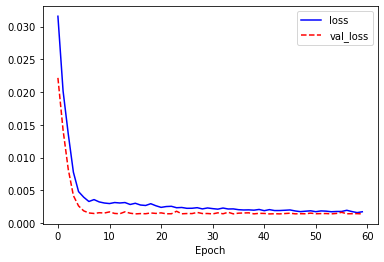

In [ ]:
import matplotlib.pyplot as plt
plt.plot(SS_history.history['loss'], 'b-', label = 'loss')
plt.plot(SS_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# SS 모델 예측율 구하기

In [ ]:
SS_model.evaluate(X[129:], Y[129:])
prediction = SS_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = SS_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.1:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 3ms/step - loss: 0.0014
[0.32 0.01 0.05 0.27 0.11 0.09] 	 [0.34078252 0.0516922  0.09250262 0.25837567 0.06262057 0.05583236] 	diff: [0.02078252 0.0416922  0.04250262 0.01162433 0.04737943 0.03416764]
[0.44 0.2  0.2  0.27 0.05 0.05] 	 [0.34495777 0.05297107 0.09472418 0.26217347 0.06334999 0.05672057] 	diff: [0.09504223 0.14702893 0.10527582 0.00782653 0.01334999 0.00672057]
[0.29 0.   0.04 0.27 0.11 0.08] 	 [0.34543985 0.05483433 0.09656262 0.26177806 0.06498688 0.05750133] 	diff: [0.05543985 0.05483433 0.05656262 0.00822194 0.04501312 0.02249867]
[0.33 0.02 0.07 0.27 0.04 0.03] 	 [0.34954822 0.05641859 0.09788215 0.26487416 0.06602629 0.05811313] 	diff: [0.01954822 0.03641859 0.02788215 0.00512584 0.02602629 0.02811313]
[0.3  0.03 0.05 0.26 0.04 0.04] 	 [0.34533995 0.05306867 0.09439634 0.26222745 0.06302363 0.05625487] 	diff: [0.04533995 0.02306867 0.04439634 0.00222745 0.02302363 0.01625487]
[0.31 0.01 0.06 0.24 0.06 0.05] 	 [0.34043896 0.0

# SS 모델 저장

In [ ]:
SS_model.save('SS.h5')
SS_model = load_model('SS.h5')

# SS 예측 범위 구하기

In [ ]:
SS_test = []

for i in range(36):
  SS_test.append(list(SS_20_01.iloc[i]))
  SS_test.append(list(SS_20_02.iloc[i]))
  SS_test.append(list(SS_20_03.iloc[i]))

In [ ]:
SS_test = np.array(SS_test)
SS_test.shape

SS_test = SS_test.reshape(36 ,3, 6)

SS = SS_model.predict(SS_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
SS[20:]

array([[0.33727145, 0.04901017, 0.09051859, 0.25678694, 0.06016125,
        0.05488895],
       [0.343333  , 0.05217531, 0.09394175, 0.2611767 , 0.06227594,
        0.05598968],
       [0.33827657, 0.05126566, 0.09184855, 0.2570707 , 0.06181465,
        0.0550994 ],
       [0.34416473, 0.05395525, 0.09435163, 0.26061904, 0.06421432,
        0.05739643],
       [0.3381585 , 0.0507443 , 0.09121248, 0.2559225 , 0.06229804,
        0.05522937],
       [0.34502846, 0.05423195, 0.0945703 , 0.26178062, 0.06378658,
        0.05589405],
       [0.3475838 , 0.05548073, 0.0966191 , 0.26369816, 0.06440158,
        0.05748826],
       [0.33874536, 0.04972947, 0.09082348, 0.25748795, 0.0610574 ,
        0.05502951],
       [0.33853433, 0.0508044 , 0.09161627, 0.25694633, 0.06226763,
        0.05548607],
       [0.33830953, 0.04938822, 0.09066906, 0.25680912, 0.06092601,
        0.05508811],
       [0.34360832, 0.05286348, 0.09496418, 0.26099896, 0.06262764,
        0.05680436],
       [0.33900338, 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
SS_AB = np.sum(SS[20:,0])
SS_HIT = np.sum(SS[20:,2])
SS_AVG = SS_HIT / SS_AB

SS_INN2 = np.sum(SS[20:,3])
SS_ER = np.sum(SS[20:,5])
SS_ERA = (SS_ER * 9) / (SS_INN2 / 3)

SS_total_RUN = np.sum(SS[20:,1]) * 100
SS_total_R = np.sum(SS[20:, 4]) * 100

print("삼성 타율 값 : ", SS_AVG)
print("삼성 방어율 값 : ", SS_ERA)
print("삼성 득점 total : ", SS_total_RUN)
print("삼성 실점 total : ", SS_total_R)

삼성 타율 값 :  0.2721971
삼성 방어율 값 :  5.820045374275703
삼성 득점 total :  83.08794498443604
삼성 실점 total :  99.77556467056274


# SK 타율, 방어율, 승률 예측

# SK - 불필요한 Column 제거

In [ ]:
del SK_16['VS_T_ID']
del SK_16['T_ID']
del SK_16['GDAY_DS']

del SK_17['VS_T_ID']
del SK_17['T_ID']
del SK_17['GDAY_DS']

del SK_18['VS_T_ID']
del SK_18['T_ID']
del SK_18['GDAY_DS']

del SK_19['VS_T_ID']
del SK_19['T_ID']
del SK_19['GDAY_DS']

del SK_20['VS_T_ID']
del SK_20['T_ID']
del SK_20['GDAY_DS']

# SK - 게임 수로 데이터 쪼개기

In [ ]:
# SK 2016년
SK_16_01 = SK_16[(SK_16['GAME'] >= 1) & (SK_16['GAME'] <= 36)]
SK_16_02 = SK_16[(SK_16['GAME'] >= 37) & (SK_16['GAME'] <= 72)]
SK_16_03 = SK_16[(SK_16['GAME'] >= 73) & (SK_16['GAME'] <= 108)]
SK_16_04 = SK_16[(SK_16['GAME'] >= 109) & (SK_16['GAME'] <= 144)]

# SK 2017년
SK_17_01 = SK_17[(SK_17['GAME'] >= 1) & (SK_17['GAME'] <= 36)]
SK_17_02 = SK_17[(SK_17['GAME'] >= 37) & (SK_17['GAME'] <= 72)]
SK_17_03 = SK_17[(SK_17['GAME'] >= 73) & (SK_17['GAME'] <= 108)]
SK_17_04 = SK_17[(SK_17['GAME'] >= 109) & (SK_17['GAME'] <= 144)]

# SK 2018년
SK_18_01 = SK_18[(SK_18['GAME'] >= 1) & (SK_18['GAME'] <= 36)]
SK_18_02 = SK_18[(SK_18['GAME'] >= 37) & (SK_18['GAME'] <= 72)]
SK_18_03 = SK_18[(SK_18['GAME'] >= 73) & (SK_18['GAME'] <= 108)]
SK_18_04 = SK_18[(SK_18['GAME'] >= 109) & (SK_18['GAME'] <= 144)]

# SK 2019년
SK_19_01 = SK_19[(SK_19['GAME'] >= 1) & (SK_19['GAME'] <= 36)]
SK_19_02 = SK_19[(SK_19['GAME'] >= 37) & (SK_19['GAME'] <= 72)]
SK_19_03 = SK_19[(SK_19['GAME'] >= 73) & (SK_19['GAME'] <= 108)]
SK_19_04 = SK_19[(SK_19['GAME'] >= 109) & (SK_19['GAME'] <= 144)]

# SK 2020년
SK_20_01 = SK_20[(SK_20['GAME'] >= 1) & (SK_20['GAME'] <= 36)]
SK_20_02 = SK_20[(SK_20['GAME'] >= 37) & (SK_20['GAME'] <= 72)]
SK_20_03 = SK_20[(SK_20['GAME'] >= 73) & (SK_20['GAME'] <= 108)]

In [ ]:
del SK_16_01['GAME']
del SK_16_02['GAME']
del SK_16_03['GAME']
del SK_16_04['GAME']

del SK_17_01['GAME']
del SK_17_02['GAME']
del SK_17_03['GAME']
del SK_17_04['GAME']

del SK_18_01['GAME']
del SK_18_02['GAME']
del SK_18_03['GAME']
del SK_18_04['GAME']

del SK_19_01['GAME']
del SK_19_02['GAME']
del SK_19_03['GAME']
del SK_19_04['GAME']

del SK_20_01['GAME']
del SK_20_02['GAME']
del SK_20_03['GAME']

# SK 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(SK_16_01.iloc[i]))
  X.append(list(SK_16_02.iloc[i]))
  X.append(list(SK_16_03.iloc[i]))
  X.append(list(SK_17_01.iloc[i]))
  X.append(list(SK_17_02.iloc[i]))
  X.append(list(SK_17_03.iloc[i]))
  X.append(list(SK_18_01.iloc[i]))
  X.append(list(SK_18_02.iloc[i]))
  X.append(list(SK_18_03.iloc[i]))
  X.append(list(SK_19_01.iloc[i]))
  X.append(list(SK_19_02.iloc[i]))
  X.append(list(SK_19_03.iloc[i]))


for j in range(36):
  Y.append(list(SK_16_04.iloc[j]))
  Y.append(list(SK_17_04.iloc[j]))
  Y.append(list(SK_18_04.iloc[j]))
  Y.append(list(SK_19_04.iloc[j]))


In [ ]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
SK_model= tf.keras.Sequential([
  tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
  tf.keras.layers.LSTM(units = 30),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6)
  ])

SK_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
SK_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_39 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_19 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SK_history = SK_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 177ms/step - loss: 0.0312 - val_loss: 0.0222
Epoch 2/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0213 - val_loss: 0.0144
Epoch 3/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.0082
Epoch 4/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 6/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 7/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 8/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 10/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 11/60
4/4 [====================

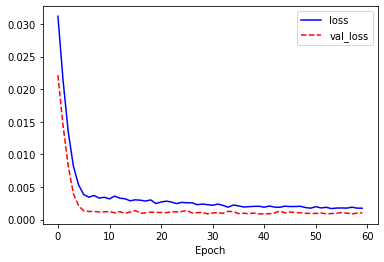

In [ ]:
import matplotlib.pyplot as plt
plt.plot(SK_history.history['loss'], 'b-', label = 'loss')
plt.plot(SK_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# SK 모델 예측율 구하기

In [ ]:
SK_model.evaluate(X[129:], Y[129:])
prediction = SK_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = SK_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.06:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 2ms/step - loss: 0.0014
[0.4  0.07 0.16 0.27 0.02 0.02] 	 [0.32659405 0.04519024 0.08996019 0.25325924 0.05797222 0.05298747] 	diff: [0.07340595 0.02480976 0.07003981 0.01674076 0.03797222 0.03298747]
[0.32 0.06 0.1  0.27 0.01 0.01] 	 [0.3198229  0.0451489  0.09021448 0.24988982 0.05775207 0.05187195] 	diff: [0.00017709 0.0148511  0.00978552 0.02011018 0.04775207 0.04187195]
[0.33 0.01 0.07 0.24 0.02 0.02] 	 [0.31613308 0.0445455  0.08826172 0.24799964 0.05464295 0.05017015] 	diff: [0.01386692 0.0345455  0.01826172 0.00799964 0.03464295 0.03017015]
[0.32 0.04 0.11 0.27 0.02 0.02] 	 [0.31941575 0.04500603 0.0885233  0.2493937  0.05605497 0.05131921] 	diff: [0.00058425 0.00500603 0.0214767  0.0206063  0.03605497 0.03131921]
[0.31 0.02 0.06 0.24 0.2  0.2 ] 	 [0.31168592 0.04517939 0.08704853 0.2456637  0.05270833 0.04863609] 	diff: [0.00168592 0.02517939 0.02704853 0.0056637  0.14729167 0.15136391]
[0.31 0.   0.05 0.27 0.04 0.04] 	 [0.32628712 0.0

# SK 모델 저장

In [ ]:
SK_model.save('SK.h5')
SK_model = load_model('SK.h5')

# SK 예측 범위 구하기

In [ ]:
SK_test = []

for i in range(36):
  SK_test.append(list(SK_20_01.iloc[i]))
  SK_test.append(list(SK_20_02.iloc[i]))
  SK_test.append(list(SK_20_03.iloc[i]))

In [ ]:
SK_test = np.array(SK_test)
SK_test.shape

SK_test = SK_test.reshape(36 ,3, 6)

In [ ]:
SK = SK_model.predict(SK_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
SK[18:]

array([[0.31301945, 0.04470444, 0.08749808, 0.24636266, 0.05400479,
        0.0496729 ],
       [0.31355268, 0.04481664, 0.08781207, 0.24660984, 0.0534847 ,
        0.0489899 ],
       [0.31910425, 0.04471117, 0.08885852, 0.2492754 , 0.05610419,
        0.05134733],
       [0.31557113, 0.04480185, 0.088588  , 0.24765915, 0.05572024,
        0.05063745],
       [0.31191385, 0.04430212, 0.08800299, 0.24569508, 0.05445667,
        0.04979071],
       [0.32071036, 0.04439377, 0.08855905, 0.25020003, 0.05532912,
        0.05097446],
       [0.31832367, 0.04462594, 0.09153318, 0.24988928, 0.0578274 ,
        0.05179004],
       [0.31107157, 0.04452975, 0.08957797, 0.24595907, 0.05539609,
        0.05006596],
       [0.3147263 , 0.04455499, 0.08919677, 0.24737695, 0.05610809,
        0.05075505],
       [0.3121813 , 0.04502822, 0.08811811, 0.24601394, 0.05459502,
        0.04972599],
       [0.31138653, 0.0450551 , 0.08728838, 0.24550721, 0.05280227,
        0.04851633],
       [0.31911695, 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
SK_AB = np.sum(SK[18:,0])
SK_HIT = np.sum(SK[18:,2])
SK_AVG = SK_HIT / SK_AB

SK_INN2 = np.sum(SK[18:,3])
SK_ER = np.sum(SK[18:,5])
SK_ERA = (SK_ER * 9) / (SK_INN2 / 3)

SK_total_RUN = np.sum(SK[18:,1]) * 100
SK_total_R = np.sum(SK[18:, 4]) * 100

print("SK 타율 값 : ", SK_AVG)
print("SK 방어율 값 : ", SK_ERA)
print("SK 득점 total : ", SK_total_RUN)
print("SK 실점 total : ", SK_total_R)

SK 타율 값 :  0.28223416
SK 방어율 값 :  5.482345512870442
SK 득점 total :  80.7490348815918
SK 실점 total :  99.67296719551086


# HH 타율, 방어율, 승률 예측

# HH - 불필요한 Column 제거

In [ ]:
del HH_16['VS_T_ID']
del HH_16['T_ID']
del HH_16['GDAY_DS']

del HH_17['VS_T_ID']
del HH_17['T_ID']
del HH_17['GDAY_DS']

del HH_18['VS_T_ID']
del HH_18['T_ID']
del HH_18['GDAY_DS']

del HH_19['VS_T_ID']
del HH_19['T_ID']
del HH_19['GDAY_DS']

del HH_20['VS_T_ID']
del HH_20['T_ID']
del HH_20['GDAY_DS']


# HH - 게임 수로 데이터 쪼개기

In [ ]:
# HH 2016년
HH_16_01 = HH_16[(HH_16['GAME'] >= 1) & (HH_16['GAME'] <= 36)]
HH_16_02 = HH_16[(HH_16['GAME'] >= 37) & (HH_16['GAME'] <= 72)]
HH_16_03 = HH_16[(HH_16['GAME'] >= 73) & (HH_16['GAME'] <= 108)]
HH_16_04 = HH_16[(HH_16['GAME'] >= 109) & (HH_16['GAME'] <= 144)]

# HH 2017년
HH_17_01 = HH_17[(HH_17['GAME'] >= 1) & (HH_17['GAME'] <= 36)]
HH_17_02 = HH_17[(HH_17['GAME'] >= 37) & (HH_17['GAME'] <= 72)]
HH_17_03 = HH_17[(HH_17['GAME'] >= 73) & (HH_17['GAME'] <= 108)]
HH_17_04 = HH_17[(HH_17['GAME'] >= 109) & (HH_17['GAME'] <= 144)]

# HH 2018년
HH_18_01 = HH_18[(HH_18['GAME'] >= 1) & (HH_18['GAME'] <= 36)]
HH_18_02 = HH_18[(HH_18['GAME'] >= 37) & (HH_18['GAME'] <= 72)]
HH_18_03 = HH_18[(HH_18['GAME'] >= 73) & (HH_18['GAME'] <= 108)]
HH_18_04 = HH_18[(HH_18['GAME'] >= 109) & (HH_18['GAME'] <= 144)]

# HH 2019년
HH_19_01 = HH_19[(HH_19['GAME'] >= 1) & (HH_19['GAME'] <= 36)]
HH_19_02 = HH_19[(HH_19['GAME'] >= 37) & (HH_19['GAME'] <= 72)]
HH_19_03 = HH_19[(HH_19['GAME'] >= 73) & (HH_19['GAME'] <= 108)]
HH_19_04 = HH_19[(HH_19['GAME'] >= 109) & (HH_19['GAME'] <= 144)]

# HH 2020년
HH_20_01 = HH_20[(HH_20['GAME'] >= 1) & (HH_20['GAME'] <= 36)]
HH_20_02 = HH_20[(HH_20['GAME'] >= 37) & (HH_20['GAME'] <= 72)]
HH_20_03 = HH_20[(HH_20['GAME'] >= 73) & (HH_20['GAME'] <= 108)]


In [ ]:
del HH_16_01['GAME']
del HH_16_02['GAME']
del HH_16_03['GAME']
del HH_16_04['GAME']

del HH_17_01['GAME']
del HH_17_02['GAME']
del HH_17_03['GAME']
del HH_17_04['GAME']

del HH_18_01['GAME']
del HH_18_02['GAME']
del HH_18_03['GAME']
del HH_18_04['GAME']

del HH_19_01['GAME']
del HH_19_02['GAME']
del HH_19_03['GAME']
del HH_19_04['GAME']

del HH_20_01['GAME']
del HH_20_02['GAME']
del HH_20_03['GAME']

# HH 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(HH_16_01.iloc[i]))
  X.append(list(HH_16_02.iloc[i]))
  X.append(list(HH_16_03.iloc[i]))
  X.append(list(HH_17_01.iloc[i]))
  X.append(list(HH_17_02.iloc[i]))
  X.append(list(HH_17_03.iloc[i]))
  X.append(list(HH_18_01.iloc[i]))
  X.append(list(HH_18_02.iloc[i]))
  X.append(list(HH_18_03.iloc[i]))
  X.append(list(HH_19_01.iloc[i]))
  X.append(list(HH_19_02.iloc[i]))
  X.append(list(HH_19_03.iloc[i]))


for j in range(36):
  Y.append(list(HH_16_04.iloc[j]))
  Y.append(list(HH_17_04.iloc[j]))
  Y.append(list(HH_18_04.iloc[j]))
  Y.append(list(HH_19_04.iloc[j]))


In [ ]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
HH_model= tf.keras.Sequential([
  tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
  tf.keras.layers.LSTM(units = 30),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6)
  ])

HH_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
HH_model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_41 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_20 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
HH_history = HH_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)


Epoch 1/60
4/4 [==============================] - 1s 180ms/step - loss: 0.0328 - val_loss: 0.0263
Epoch 2/60
4/4 [==============================] - 0s 9ms/step - loss: 0.0210 - val_loss: 0.0169
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0133 - val_loss: 0.0095
Epoch 4/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 5/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 6/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 7/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 8/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 10/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 11/60
4/4 [====================

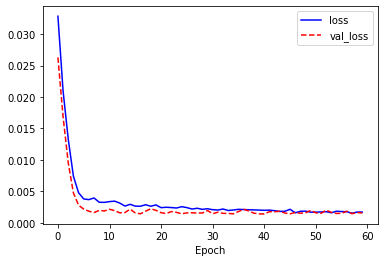

In [ ]:
import matplotlib.pyplot as plt
plt.plot(HH_history.history['loss'], 'b-', label = 'loss')
plt.plot(HH_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# HH 모델 예측율 구하기

In [ ]:
HH_model.evaluate(X[129:], Y[129:])
prediction = HH_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = HH_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.1:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 1ms/step - loss: 0.0016
[0.34 0.02 0.08 0.27 0.07 0.07] 	 [0.34066603 0.04908802 0.09832745 0.2685511  0.05303489 0.04865716] 	diff: [0.00066603 0.02908802 0.01832745 0.00144889 0.01696511 0.02134284]
[0.34 0.05 0.09 0.24 0.08 0.08] 	 [0.33486754 0.04819782 0.0967796  0.26444334 0.0525474  0.04867873] 	diff: [0.00513246 0.00180218 0.0067796  0.02444334 0.0274526  0.03132127]
[0.38 0.04 0.13 0.27 0.02 0.01] 	 [0.33439353 0.04857399 0.09595452 0.26469955 0.05221071 0.04644306] 	diff: [0.04560647 0.00857399 0.03404548 0.00530045 0.03221071 0.03644306]
[0.42 0.13 0.2  0.27 0.05 0.05] 	 [0.33461183 0.04865038 0.09758247 0.264868   0.05181877 0.04730013] 	diff: [0.08538817 0.08134962 0.10241753 0.00513201 0.00181877 0.00269987]
[0.32 0.01 0.08 0.27 0.04 0.03] 	 [0.3327511  0.04678797 0.09724155 0.2611182  0.04888976 0.04588589] 	diff: [0.0127511  0.03678797 0.01724155 0.0088818  0.00888976 0.01588589]
[0.4  0.1  0.16 0.27 0.06 0.05] 	 [0.33578914 0.0

# HH 모델 저장

In [ ]:
HH_model.save('HH.h5')
HH_model = load_model('HH.h5')


# HH 예측 범위 구하기

In [ ]:
HH_test = []

for i in range(36):
  HH_test.append(list(HH_20_01.iloc[i]))
  HH_test.append(list(HH_20_02.iloc[i]))
  HH_test.append(list(HH_20_03.iloc[i]))

In [ ]:
HH_test = np.array(HH_test)
HH_test.shape

HH_test = HH_test.reshape(36 ,3, 6)

In [ ]:
HH = HH_model.predict(HH_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
HH[20:]

array([[0.33590597, 0.04776477, 0.09797928, 0.26395994, 0.05025202,
        0.04709747],
       [0.33332568, 0.04749364, 0.0967234 , 0.26277393, 0.05061692,
        0.04634178],
       [0.33371037, 0.04695682, 0.09805676, 0.26197046, 0.04962775,
        0.04649448],
       [0.3336602 , 0.04795916, 0.09703667, 0.26311928, 0.05048829,
        0.04605596],
       [0.33842462, 0.04860304, 0.09793071, 0.26686853, 0.05256172,
        0.04811566],
       [0.33556026, 0.04720631, 0.09741389, 0.26317024, 0.04957937,
        0.04615713],
       [0.3366841 , 0.04834277, 0.09800242, 0.26557392, 0.05073876,
        0.04622675],
       [0.33670843, 0.04776365, 0.0983816 , 0.26492217, 0.05089893,
        0.04695419],
       [0.33761525, 0.04899329, 0.09718521, 0.26706597, 0.05213685,
        0.04614908],
       [0.33849323, 0.04810762, 0.09885742, 0.2661355 , 0.05115138,
        0.04750197],
       [0.33433044, 0.0471688 , 0.09733604, 0.2628495 , 0.04990937,
        0.04599015],
       [0.33689433, 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
HH_AB = np.sum(HH[20:,0])
HH_HIT = np.sum(HH[20:,2])
HH_AVG = HH_HIT / HH_AB

HH_INN2 = np.sum(HH[20:,3])
HH_ER = np.sum(HH[20:,5])
HH_ERA = (HH_ER * 9) / (HH_INN2 / 3)

HH_total_RUN = np.sum(HH[20:,1]) * 100
HH_total_R = np.sum(HH[20:, 4]) * 100

print("한화 타율 값 : ", HH_AVG)
print("한화 방어율 값 : ", HH_ERA)
print("한화 득점 total : ", HH_total_RUN)
print("한화 실점 total : ", HH_total_R)

한화 타율 값 :  0.29090157
한화 방어율 값 :  4.779526294192645
한화 득점 total :  76.49612426757812
한화 실점 total :  81.15765452384949


# HT 타율, 방어율, 승률 예측

# HT - 불필요한 Column 제거

In [ ]:
del HT_16['VS_T_ID']
del HT_16['T_ID']
del HT_16['GDAY_DS']

del HT_17['VS_T_ID']
del HT_17['T_ID']
del HT_17['GDAY_DS']

del HT_18['VS_T_ID']
del HT_18['T_ID']
del HT_18['GDAY_DS']

del HT_19['VS_T_ID']
del HT_19['T_ID']
del HT_19['GDAY_DS']

del HT_20['VS_T_ID']
del HT_20['T_ID']
del HT_20['GDAY_DS']

# HT - 게임 수로 데이터 쪼개기

In [ ]:
# HT 2016년
HT_16_01 = HT_16[(HT_16['GAME'] >= 1) & (HT_16['GAME'] <= 36)]
HT_16_02 = HT_16[(HT_16['GAME'] >= 37) & (HT_16['GAME'] <= 72)]
HT_16_03 = HT_16[(HT_16['GAME'] >= 73) & (HT_16['GAME'] <= 108)]
HT_16_04 = HT_16[(HT_16['GAME'] >= 109) & (HT_16['GAME'] <= 144)]

# HT 2017년
HT_17_01 = HT_17[(HT_17['GAME'] >= 1) & (HT_17['GAME'] <= 36)]
HT_17_02 = HT_17[(HT_17['GAME'] >= 37) & (HT_17['GAME'] <= 72)]
HT_17_03 = HT_17[(HT_17['GAME'] >= 73) & (HT_17['GAME'] <= 108)]
HT_17_04 = HT_17[(HT_17['GAME'] >= 109) & (HT_17['GAME'] <= 144)]

# HT 2018년
HT_18_01 = HT_18[(HT_18['GAME'] >= 1) & (HT_18['GAME'] <= 36)]
HT_18_02 = HT_18[(HT_18['GAME'] >= 37) & (HT_18['GAME'] <= 72)]
HT_18_03 = HT_18[(HT_18['GAME'] >= 73) & (HT_18['GAME'] <= 108)]
HT_18_04 = HT_18[(HT_18['GAME'] >= 109) & (HT_18['GAME'] <= 144)]

# HT 2019년
HT_19_01 = HT_19[(HT_19['GAME'] >= 1) & (HT_19['GAME'] <= 36)]
HT_19_02 = HT_19[(HT_19['GAME'] >= 37) & (HT_19['GAME'] <= 72)]
HT_19_03 = HT_19[(HT_19['GAME'] >= 73) & (HT_19['GAME'] <= 108)]
HT_19_04 = HT_19[(HT_19['GAME'] >= 109) & (HT_19['GAME'] <= 144)]

# HT 2020년
HT_20_01 = HT_20[(HT_20['GAME'] >= 1) & (HT_20['GAME'] <= 36)]
HT_20_02 = HT_20[(HT_20['GAME'] >= 37) & (HT_20['GAME'] <= 72)]
HT_20_03 = HT_20[(HT_20['GAME'] >= 73) & (HT_20['GAME'] <= 108)]

In [ ]:
del HT_16_01['GAME']
del HT_16_02['GAME']
del HT_16_03['GAME']
del HT_16_04['GAME']

del HT_17_01['GAME']
del HT_17_02['GAME']
del HT_17_03['GAME']
del HT_17_04['GAME']

del HT_18_01['GAME']
del HT_18_02['GAME']
del HT_18_03['GAME']
del HT_18_04['GAME']

del HT_19_01['GAME']
del HT_19_02['GAME']
del HT_19_03['GAME']
del HT_19_04['GAME']

del HT_20_01['GAME']
del HT_20_02['GAME']
del HT_20_03['GAME']

# HT 학습 데이터 구축

In [ ]:
X = []
Y = []

for i in range(36):
  X.append(list(HT_16_01.iloc[i]))
  X.append(list(HT_16_02.iloc[i]))
  X.append(list(HT_16_03.iloc[i]))
  X.append(list(HT_17_01.iloc[i]))
  X.append(list(HT_17_02.iloc[i]))
  X.append(list(HT_17_03.iloc[i]))
  X.append(list(HT_18_01.iloc[i]))
  X.append(list(HT_18_02.iloc[i]))
  X.append(list(HT_18_03.iloc[i]))
  X.append(list(HT_19_01.iloc[i]))
  X.append(list(HT_19_02.iloc[i]))
  X.append(list(HT_19_03.iloc[i]))


for j in range(36):
  Y.append(list(HT_16_04.iloc[j]))
  Y.append(list(HT_17_04.iloc[j]))
  Y.append(list(HT_18_04.iloc[j]))
  Y.append(list(HT_19_04.iloc[j]))

In [ ]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(144, 3, 6)
print(X.shape)
print(Y.shape)

(144, 3, 6)
(144, 6)


# LSTM 모델 생성 및 컴파일

In [ ]:
HT_model= tf.keras.Sequential([
  tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[3, 6]),
  tf.keras.layers.LSTM(units = 30),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6)
  ])

HT_model.compile(optimizer='rmsprop', loss='mse')   #'rmsprop'
HT_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 3, 30)             4440      
_________________________________________________________________
lstm_43 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_21 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 186       
Total params: 11,946
Trainable params: 11,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
HT_history = HT_model.fit(X[:144], Y[:144], epochs = 60, batch_size = 40, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 188ms/step - loss: 0.0287 - val_loss: 0.0197
Epoch 2/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0179 - val_loss: 0.0120
Epoch 3/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0109 - val_loss: 0.0067
Epoch 4/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0065 - val_loss: 0.0035
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0021
Epoch 6/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 7/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 8/60
4/4 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 10/60
4/4 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 11/60
4/4 [====================

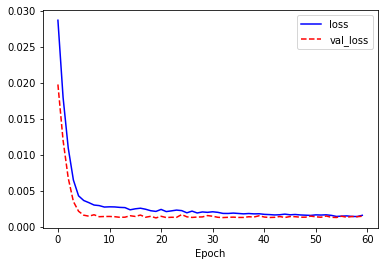

In [ ]:
import matplotlib.pyplot as plt
plt.plot(HT_history.history['loss'], 'b-', label = 'loss')
plt.plot(HT_history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# HT 모델 예측율 구하기

In [ ]:
HT_model.evaluate(X[129:], Y[129:])
prediction = HT_model.predict(X[129:129+15])

for i in range(15):
  print(Y[129+i], '\t', prediction[i], '\tdiff:', abs(prediction[i] - Y[129 + i]))

prediction = HT_model.predict(X[129:])
fail = 0
for i in range(len(prediction)):
  for j in range(6):
    if abs(prediction[i][j] - Y[129+i][j]) > 0.1:
      fail += 1
print('correctness:', (129 - fail) / 129*100, '%')

1/1 [==============================] - 0s 2ms/step - loss: 0.0014
[0.4  0.07 0.16 0.27 0.02 0.02] 	 [0.32524902 0.05376532 0.08892065 0.24575259 0.05488455 0.04940482] 	diff: [0.07475098 0.01623468 0.07107935 0.02424741 0.03488455 0.02940482]
[0.32 0.06 0.1  0.27 0.01 0.01] 	 [0.31904113 0.05232286 0.08336424 0.24256717 0.05341269 0.04660468] 	diff: [0.00095887 0.00767714 0.01663576 0.02743283 0.04341269 0.03660468]
[0.33 0.01 0.07 0.24 0.02 0.02] 	 [0.31851077 0.05153487 0.08310627 0.24334405 0.05342472 0.04635922] 	diff: [0.01148923 0.04153487 0.01310627 0.00334405 0.03342472 0.02635922]
[0.32 0.04 0.11 0.27 0.02 0.02] 	 [0.31733966 0.05230293 0.08372694 0.24136522 0.05259414 0.04708067] 	diff: [0.00266034 0.01230293 0.02627306 0.02863478 0.03259414 0.02708067]
[0.31 0.02 0.06 0.24 0.2  0.2 ] 	 [0.31841457 0.05206856 0.08253244 0.24516746 0.05328753 0.04597877] 	diff: [0.00841457 0.03206856 0.02253244 0.00516746 0.14671247 0.15402123]
[0.31 0.   0.05 0.27 0.04 0.04] 	 [0.32491004 0.0

# HT 모델 저장

In [ ]:
HT_model.save('HT.h5')
HT_model = load_model('HT.h5')

# HT 예측 범위 구하기

In [ ]:
HT_test = []

for i in range(36):
  HT_test.append(list(HT_20_01.iloc[i]))
  HT_test.append(list(HT_20_02.iloc[i]))
  HT_test.append(list(HT_20_03.iloc[i]))


In [ ]:
HT_test = np.array(HT_test)
HT_test.shape

HT_test = HT_test.reshape(36 ,3, 6)

In [ ]:
HT = HT_model.predict(HT_test)

In [ ]:
# 과제 범위 기간 내 예측 값 출력 ['AB', 'RUN', 'HIT', 'INN2', 'R', 'ER']
HT[19:]

array([[0.318528  , 0.05193336, 0.0837901 , 0.24309729, 0.05352993,
        0.04675224],
       [0.3157643 , 0.05117256, 0.08211409, 0.24201095, 0.05341998,
        0.04594392],
       [0.31994906, 0.05265579, 0.08374248, 0.24525744, 0.05325775,
        0.04677815],
       [0.31889206, 0.0518586 , 0.0834275 , 0.24279411, 0.0535308 ,
        0.04671409],
       [0.31814218, 0.05115571, 0.08145022, 0.24339426, 0.05409928,
        0.04565257],
       [0.32195112, 0.05276832, 0.08437018, 0.24599187, 0.05436669,
        0.04679213],
       [0.32071462, 0.05289338, 0.08484259, 0.24425498, 0.05352383,
        0.04731337],
       [0.32233536, 0.05384251, 0.0871169 , 0.24523401, 0.05306398,
        0.04836723],
       [0.31615132, 0.0516907 , 0.08139253, 0.24353088, 0.05250312,
        0.04550263],
       [0.31544   , 0.05203248, 0.08239782, 0.24146336, 0.05208551,
        0.04635191],
       [0.32035625, 0.05290651, 0.08586449, 0.24426846, 0.05359941,
        0.04782727],
       [0.3184107 , 0

In [ ]:
# 타율, 방어율, 득점&실점 예측하기
HT_AB = np.sum(HT[19:,0])
HT_HIT = np.sum(HT[19:,2])
HT_AVG = HT_HIT / HT_AB

HT_INN2 = np.sum(HT[19:,3])
HT_ER = np.sum(HT[19:,5])
HT_ERA = (HT_ER * 9) / (HT_INN2 / 3)

HT_total_RUN = np.sum(HT[19:,1]) * 100
HT_total_R = np.sum(HT[19:, 4]) * 100

print("KIA 타율 값 : ", HT_AVG)
print("KIA 방어율 값 : ", HT_ERA)
print("KIA 득점 total : ", HT_total_RUN)
print("KIA 실점 total : ", HT_total_R)

KIA 타율 값 :  0.26148868
KIA 방어율 값 :  5.161378638966509
KIA 득점 total :  88.35067749023438
KIA 실점 total :  90.63946604728699
